# Import Dataset

In [2]:
import pandas as pd

df = pd.read_csv("./dataset/dataset_final.csv")
df.head()

,GENHLTH,MENTHLTH,CHECKUP1,EXERANY2,BPHIGH6,TOLDHI3,DIABETE4,_AGE80,WEIGHT2,HEIGHT3,...,AVEDRNK3,MAXDRNKS,FRUIT2,FRUITJU2,FVGREEN1,FRENCHF1,POTATOE1,VEGETAB2,SEXVAR,CVD
0,Very Good,10.0,Within the past year,Yes,Yes,Yes,Yes,62.0,88.43537414965986,162.56,...,3.0,6.0,12.0,20.0,3.0,16.0,8.0,20.0,Female,False
1,Good,5.0,Within the past year,Yes,Yes,No,No,65.0,108.84353741496598,165.1,...,2.0,2.0,30.0,Never,8.0,8.0,12.0,16.0,Female,False
2,Fair,5.0,Within the past year,Yes,No,No,No,66.0,84.80725623582767,165.1,...,1.0,1.0,60.0,4.0,1.0,2.0,8.0,60.0,Female,False
3,Don't Know,Don't Know,Within the past 2 years,Yes,Yes,Yes,Yes,68.0,65.75963718820861,165.1,...,Refused,Refused,Never,Don't Know,Don't Know,Don't Know,Don't Know,Don't Know,Female,True
4,Fair,25.0,Within the past year,Yes,Yes,Yes,No,64.0,85.26077097505669,167.64,...,2.0,2.0,Never,Never,3.0,2.0,4.0,30.0,Female,False


# Exploratory Data Analysis (EDA)

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 66947 entries, 0 to 66946
Data columns (total 24 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   GENHLTH   66947 non-null  object 
 1   MENTHLTH  66947 non-null  object 
 2   CHECKUP1  66947 non-null  object 
 3   EXERANY2  66947 non-null  object 
 4   BPHIGH6   66947 non-null  object 
 5   TOLDHI3   66947 non-null  object 
 6   DIABETE4  66947 non-null  object 
 7   _AGE80    66947 non-null  float64
 8   WEIGHT2   66947 non-null  object 
 9   HEIGHT3   66947 non-null  object 
 10  SMOKE100  66947 non-null  object 
 11  USENOW3   66947 non-null  object 
 12  ECIGNOW1  66947 non-null  object 
 13  ALCDAY5   66947 non-null  int64  
 14  AVEDRNK3  66947 non-null  object 
 15  MAXDRNKS  66947 non-null  object 
 16  FRUIT2    66947 non-null  object 
 17  FRUITJU2  66947 non-null  object 
 18  FVGREEN1  66947 non-null  object 
 19  FRENCHF1  66947 non-null  object 
 20  POTATOE1  66947 non-null  ob

From that df.info() there are no columns that have null values

## Univariate Analysis

### GENHLTH

In [4]:
df['GENHLTH'].value_counts()

Very Good     25243
Good          21615
Excellent      9467
Fair           8237
Poor           2271
Don't Know       80
Refused          34
Name: GENHLTH, dtype: int64

This general health column has 5 levels ranging from Poor to Very Good. But there is data that we don't want, namely Dont Know and Refused. Both unwanted data can be dropped.

In [5]:
df = df.loc[(df['GENHLTH'] != "Don't Know") & (df['GENHLTH'] != "Refused")]

Thus, we can plot the distribution of this category more clearly as in the following plot

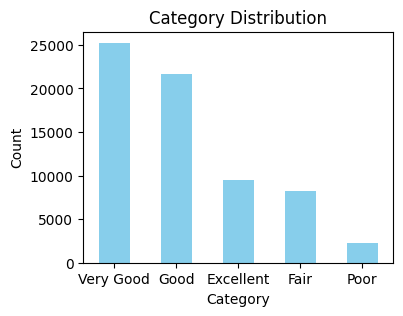

In [6]:
import matplotlib.pyplot as plt

# Count the occurrences of each category
category_counts = df['GENHLTH'].value_counts()

# Plotting
plt.figure(figsize=(4, 3))
category_counts.plot(kind='bar', color='skyblue')
plt.title('Category Distribution')
plt.xlabel('Category')
plt.ylabel('Count')
plt.xticks(rotation=0)
plt.show()

### MENTLHTH

In [7]:
df['MENTHLTH'].value_counts()

2.0           10335
5.0            8549
30.0           7475
3.0            6520
1.0            6225
10.0           6084
15.0           5101
4.0            3307
7.0            3008
20.0           2926
Don't Know     1324
25.0           1097
14.0            980
6.0             949
8.0             648
Refused         535
12.0            462
28.0            296
21.0            164
29.0            141
18.0            116
9.0              89
16.0             75
27.0             73
17.0             66
22.0             58
13.0             53
24.0             51
11.0             40
26.0             40
23.0             38
19.0              8
Name: MENTHLTH, dtype: int64

Just like before, there was some data that did not want to answer and did not know. We need to drop those two data.

In [8]:
df = df.loc[(df['MENTHLTH'] != "Don't Know") & (df['MENTHLTH'] != "Refused")]
df['MENTHLTH'] = df['MENTHLTH'].astype(float)

Now since all the data is numerical indicating the amount of stress in the last 30 days, we can plot the spread of the distribution through the following histogram plot.

<Axes: >

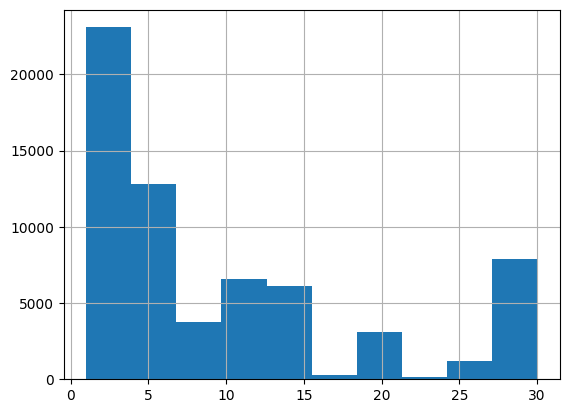

In [9]:
df['MENTHLTH'].hist()

### CHECKUP1

In [10]:
df['CHECKUP1'].value_counts()

Within the past year       48899
Within the past 2 years     9289
Within the past 5 years     4104
5 or more years ago         2230
Don't Know                   302
Never                        127
Refused                       23
Name: CHECKUP1, dtype: int64

This column indicates the last time a person had a medical checkup ranging from a year to never. Just like before, this column also has Dont Know and Refused values that need to be dropped.

In [11]:
df = df.loc[(df['CHECKUP1'] != "Don't Know") & (df['CHECKUP1'] != "Refused")]

Thus, a plot of the distribution of categories can be made

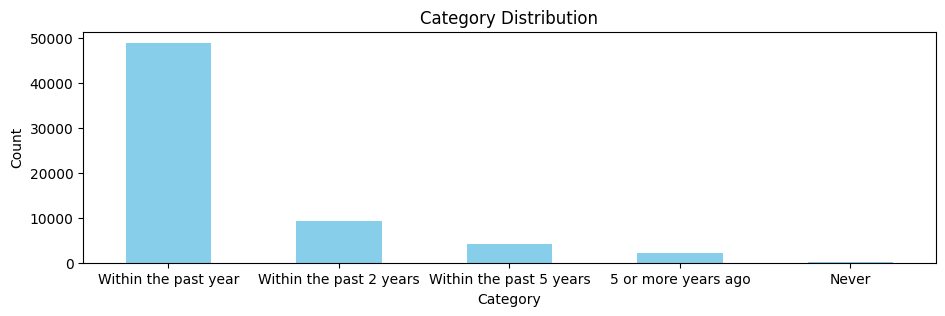

In [12]:
import matplotlib.pyplot as plt

# Count the occurrences of each category
category_counts = df['CHECKUP1'].value_counts()

# Plotting
plt.figure(figsize=(11, 3))
category_counts.plot(kind='bar', color='skyblue')
plt.title('Category Distribution')
plt.xlabel('Category')
plt.ylabel('Count')
plt.xticks(rotation=0)
plt.show()

### EXERANY2

In [13]:
df['EXERANY2'].value_counts()

Yes           52981
No            11613
Don't Know       44
Refused          11
Name: EXERANY2, dtype: int64

Furthermore, this column indicates whether or not you did any exercise in the past month. Like the previous column this column also has Dont Know and Refused values that need to be dropped.

In [14]:
df = df.loc[(df['EXERANY2'] != "Don't Know") & (df['EXERANY2'] != "Refused")]

Here's the category distribution plot after the two unwanted values are dropped

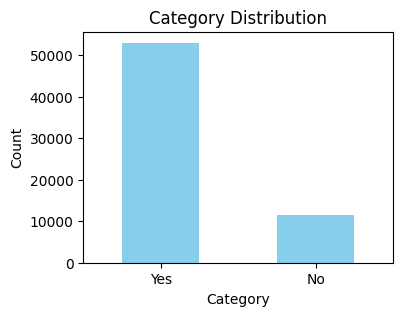

In [15]:
import matplotlib.pyplot as plt

# Count the occurrences of each category
category_counts = df['EXERANY2'].value_counts()

# Plotting
plt.figure(figsize=(4, 3))
category_counts.plot(kind='bar', color='skyblue')
plt.title('Category Distribution')
plt.xlabel('Category')
plt.ylabel('Count')
plt.xticks(rotation=0)
plt.show()

### BPHIGH6

In [16]:
df['BPHIGH6'].value_counts()

No                                            40771
Yes                                           22288
Told Borderline High BP                         759
Yes, but female told only during pregnancy      648
Don't Know                                      110
Refused                                          18
Name: BPHIGH6, dtype: int64

Just like the previous column, this column also has Dont Know and Refused values that need to be dropped.

In [17]:
df = df.loc[(df['BPHIGH6'] != "Don't Know") & (df['BPHIGH6'] != "Refused")]

Here's the category distribution plot after the two unwanted values are dropped

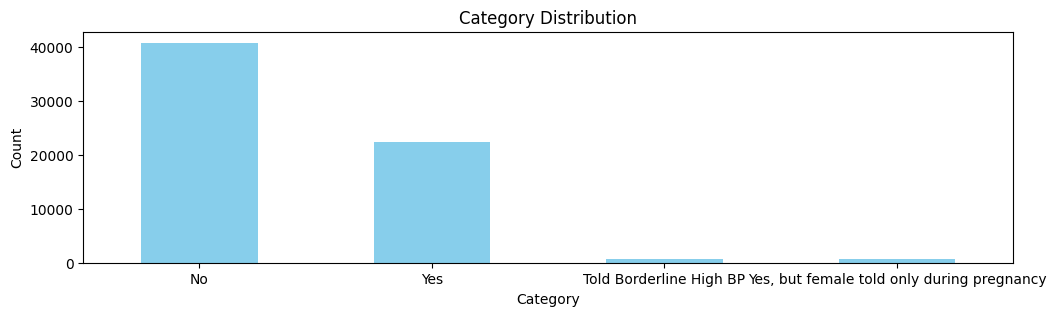

In [18]:
import matplotlib.pyplot as plt

# Count the occurrences of each category
category_counts = df['BPHIGH6'].value_counts()

# Plotting
plt.figure(figsize=(12, 3))
category_counts.plot(kind='bar', color='skyblue')
plt.title('Category Distribution')
plt.xlabel('Category')
plt.ylabel('Count')
plt.xticks(rotation=0)
plt.show()

### TOLDHI3

In [19]:
df['TOLDHI3'].value_counts()

No            40942
Yes           23145
Don't Know      357
Refused          22
Name: TOLDHI3, dtype: int64

Just like the previous column, this column also has Dont Know and Refused values that need to be dropped.

In [20]:
df = df.loc[(df['TOLDHI3'] != "Don't Know") & (df['TOLDHI3'] != "Refused")]

Here's the category distribution plot after the two unwanted values are dropped

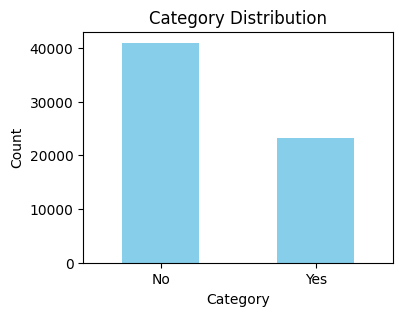

In [21]:
import matplotlib.pyplot as plt

# Count the occurrences of each category
category_counts = df['TOLDHI3'].value_counts()

# Plotting
plt.figure(figsize=(4, 3))
category_counts.plot(kind='bar', color='skyblue')
plt.title('Category Distribution')
plt.xlabel('Category')
plt.ylabel('Count')
plt.xticks(rotation=0)
plt.show()

In [22]:
df.columns

Index(['GENHLTH', 'MENTHLTH', 'CHECKUP1', 'EXERANY2', 'BPHIGH6', 'TOLDHI3',
       'DIABETE4', '_AGE80', 'WEIGHT2', 'HEIGHT3', 'SMOKE100', 'USENOW3',
       'ECIGNOW1', 'ALCDAY5', 'AVEDRNK3', 'MAXDRNKS', 'FRUIT2', 'FRUITJU2',
       'FVGREEN1', 'FRENCHF1', 'POTATOE1', 'VEGETAB2', 'SEXVAR', 'CVD'],
      dtype='object')

### DIABETE4

In [23]:
df['DIABETE4'].value_counts()

No                                            56150
Yes                                            5707
No, Borderline Diabetes                        1427
Yes, but female told only during pregnancy      747
Don't Know                                       52
Refused                                           4
Name: DIABETE4, dtype: int64

Just like the previous column, this column also has Dont Know and Refused values that need to be dropped.

In [24]:
df = df.loc[(df['DIABETE4'] != "Don't Know") & (df['DIABETE4'] != "Refused")]

Here's the category distribution plot after the two unwanted values are dropped

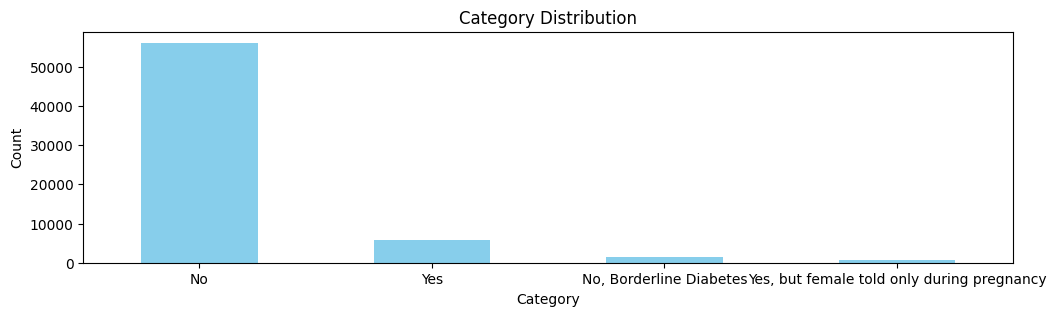

In [25]:
import matplotlib.pyplot as plt

# Count the occurrences of each category
category_counts = df['DIABETE4'].value_counts()

# Plotting
plt.figure(figsize=(12, 3))
category_counts.plot(kind='bar', color='skyblue')
plt.title('Category Distribution')
plt.xlabel('Category')
plt.ylabel('Count')
plt.xticks(rotation=0)
plt.show()

### _AGE80

Since this column already contains numerical data, a histogram plot of the data distribution can be done directly.

<Axes: >

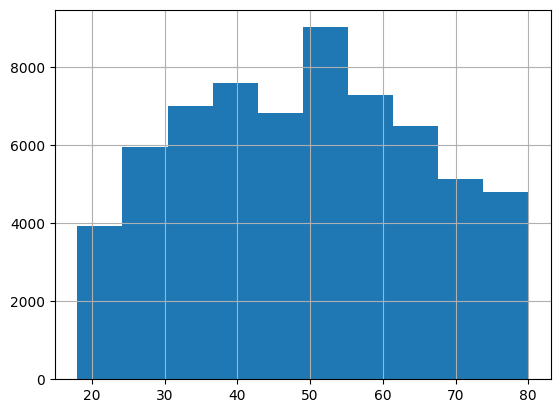

In [26]:
df['_AGE80'].hist()

### WEIGHT2

Just like the previous column, this column also has Dont Know and Refused values that need to be dropped.

In [27]:
df = df.loc[(df['WEIGHT2'] != "Don't Know") & (df['WEIGHT2'] != "Refused")]
df['WEIGHT2'] = df['WEIGHT2'].astype(float)

In this column, there are also numbers that do not make sense. There seems to be an error when inputting so that this nonsense number is dropped.

In [28]:
df[df['WEIGHT2'] > 300]['WEIGHT2']

1572     9055.0
1575     9079.0
1723     9090.0
1778     9060.0
1784     9079.0
          ...  
62851    9058.0
63159    9070.0
63324    9090.0
66386    9049.0
66866    9060.0
Name: WEIGHT2, Length: 130, dtype: float64

In [29]:
df = df[df['WEIGHT2'] <= 300]

Here's the data distribution plot after the two unwanted values are removed

<Axes: >

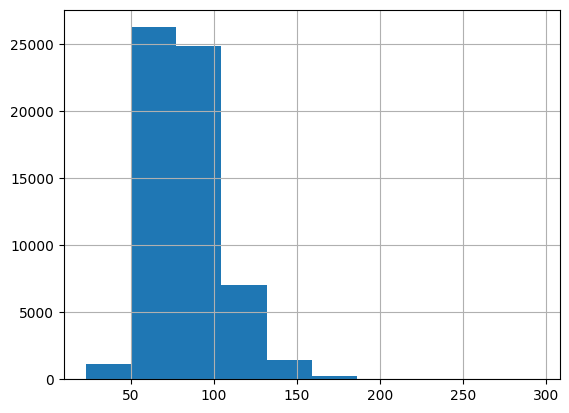

In [30]:
df['WEIGHT2'].hist()

### HEIGHT3

Just like in the weight column, there are numbers that do not make sense so it needs to be dropped. In addition, the Dont Know and Refused values also need to be dropped.

In [31]:
df = df.loc[(df['HEIGHT3'] != "Don't Know") & (df['HEIGHT3'] != "Refused")]
df['HEIGHT3'] = df['HEIGHT3'].astype(float)

In [32]:
df = df[df['HEIGHT3'] <= 250]

Here's the data distribution plot after the two unwanted values are removed

<Axes: >

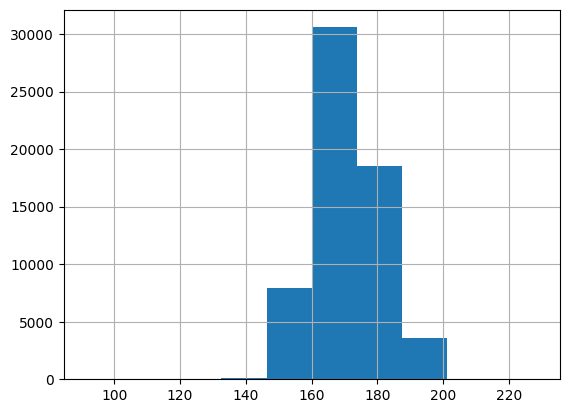

In [33]:
df['HEIGHT3'].hist()

### SMOKE100

Same as before the Dont Know and Refused values need to be dropped

In [34]:
df['SMOKE100'].value_counts()

No            34991
Yes           25573
Don't Know      209
Refused          18
Name: SMOKE100, dtype: int64

In [35]:
df = df.loc[(df['SMOKE100'] != "Don't Know") & (df['SMOKE100'] != "Refused")]

Here's the category distribution plot after the two unwanted values are dropped

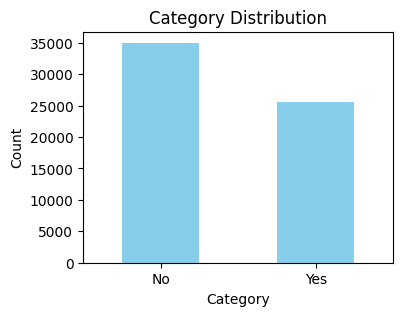

In [36]:
import matplotlib.pyplot as plt

# Count the occurrences of each category
category_counts = df['SMOKE100'].value_counts()

# Plotting
plt.figure(figsize=(4, 3))
category_counts.plot(kind='bar', color='skyblue')
plt.title('Category Distribution')
plt.xlabel('Category')
plt.ylabel('Count')
plt.xticks(rotation=0)
plt.show()

### USENOW3

Same as before the Dont Know and Refused values need to be dropped

In [37]:
df['USENOW3'].value_counts()

Not at all    58642
Every Day      1041
Some Days       856
Refused          13
Don't Know       12
Name: USENOW3, dtype: int64

In [38]:
df = df.loc[(df['USENOW3'] != "Don't Know") & (df['USENOW3'] != "Refused")]

Here's the category distribution plot after the two unwanted values are dropped

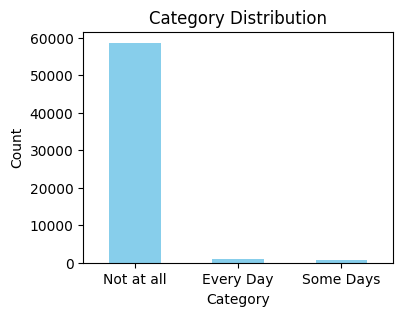

In [39]:
import matplotlib.pyplot as plt

# Count the occurrences of each category
category_counts = df['USENOW3'].value_counts()

# Plotting
plt.figure(figsize=(4, 3))
category_counts.plot(kind='bar', color='skyblue')
plt.title('Category Distribution')
plt.xlabel('Category')
plt.ylabel('Count')
plt.xticks(rotation=0)
plt.show()

### ECIGNOW1

Same as before the Dont Know and Refused values need to be dropped

In [40]:
df['ECIGNOW1'].value_counts()

Not at all           46051
Never used e-cigs    10147
Some Days             2391
Every Day             1924
Don't Know              15
Refused                 11
Name: ECIGNOW1, dtype: int64

In [41]:
df = df.loc[(df['ECIGNOW1'] != "Don't Know") & (df['ECIGNOW1'] != "Refused")]

Here's the category distribution plot after the two unwanted values are dropped

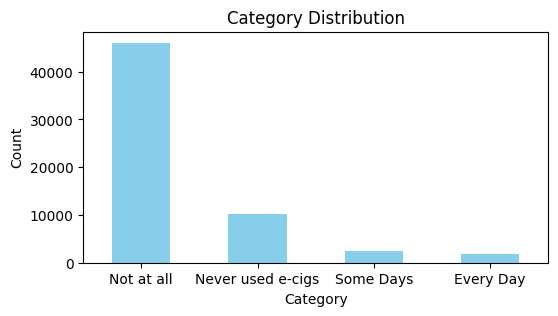

In [42]:
import matplotlib.pyplot as plt

# Count the occurrences of each category
category_counts = df['ECIGNOW1'].value_counts()

# Plotting
plt.figure(figsize=(6, 3))
category_counts.plot(kind='bar', color='skyblue')
plt.title('Category Distribution')
plt.xlabel('Category')
plt.ylabel('Count')
plt.xticks(rotation=0)
plt.show()

### ALCDAY5

Since this column already contains numerical data, a histogram plot of the data distribution can be done directly.

<Axes: >

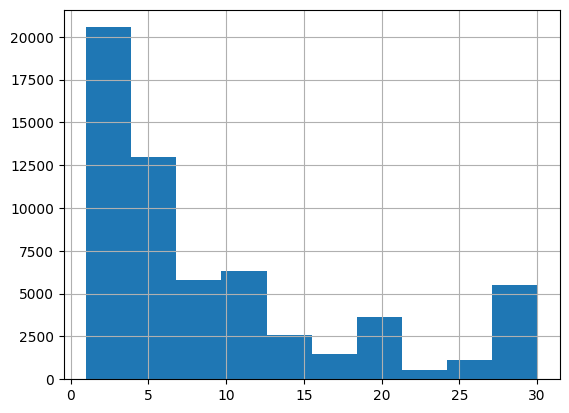

In [43]:
df['ALCDAY5'].hist()

### AVEDRNK3

Same as before the Dont Know and Refused values need to be dropped

In [44]:
df['AVEDRNK3'].value_counts()

1.0        25388
2.0        18923
3.0         7650
4.0         3176
5.0         1649
6.0         1336
77.0         539
10.0         450
8.0          399
7.0          289
12.0         207
Refused      133
15.0          94
20.0          53
9.0           46
30.0          43
16.0          17
24.0          16
11.0          16
14.0          14
25.0          14
18.0          14
13.0           9
76.0           7
40.0           4
17.0           4
60.0           3
50.0           3
36.0           3
45.0           2
28.0           2
19.0           1
23.0           1
74.0           1
21.0           1
35.0           1
26.0           1
37.0           1
56.0           1
70.0           1
48.0           1
Name: AVEDRNK3, dtype: int64

In [45]:
df = df.loc[(df['AVEDRNK3'] != "77.0") & (df['AVEDRNK3'] != "Refused")]
df['AVEDRNK3'] = df['AVEDRNK3'].astype(float)
df['AVEDRNK3'] = df['AVEDRNK3'].astype(int)

Here's the data distribution plot after the two unwanted values are removed

<Axes: >

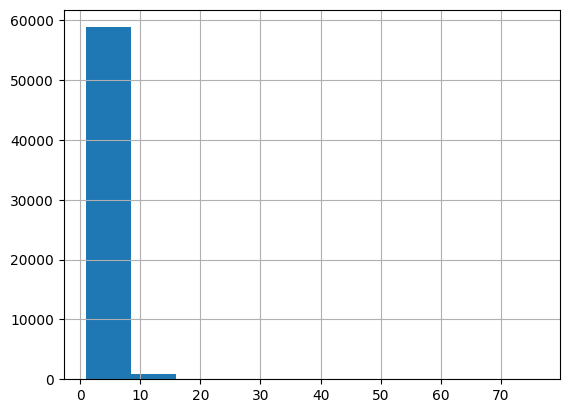

In [46]:
df['AVEDRNK3'].hist()

### MAXDRNKS

Same as before the Dont Know and Refused values need to be dropped

In [47]:
df['MAXDRNKS'].value_counts()

2.0        15408
1.0        14816
3.0         9626
4.0         5586
5.0         4024
6.0         3337
8.0         1393
10.0        1285
7.0         1230
77.0        1000
12.0         758
15.0         273
9.0          269
20.0         180
Refused      133
30.0          68
14.0          65
18.0          64
11.0          54
16.0          46
13.0          44
25.0          40
24.0          35
17.0          25
50.0          10
40.0           9
28.0           7
23.0           6
21.0           5
32.0           5
22.0           4
19.0           3
48.0           3
45.0           3
76.0           3
60.0           3
36.0           3
26.0           3
34.0           3
43.0           2
35.0           2
70.0           2
53.0           1
37.0           1
33.0           1
27.0           1
47.0           1
42.0           1
Name: MAXDRNKS, dtype: int64

In [48]:
df = df.loc[(df['MAXDRNKS'] != "77.0") & (df['MAXDRNKS'] != "Refused")]
df['MAXDRNKS'] = df['MAXDRNKS'].astype(float)
df['MAXDRNKS'] = df['MAXDRNKS'].astype(int)

Here's the data distribution plot after the two unwanted values are removed

<Axes: >

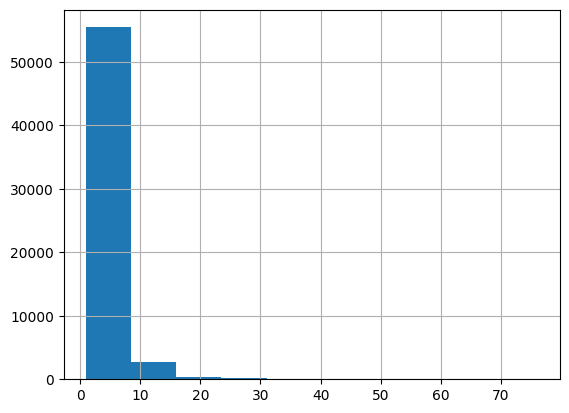

In [49]:
df['MAXDRNKS'].hist()

In [50]:
df['MAXDRNKS'].value_counts()

2     15408
1     14816
3      9626
4      5586
5      4024
6      3337
8      1393
10     1285
7      1230
12      758
15      273
9       269
20      180
30       68
14       65
18       64
11       54
16       46
13       44
25       40
24       35
17       25
50       10
40        9
28        7
23        6
21        5
32        5
22        4
36        3
45        3
34        3
26        3
60        3
48        3
76        3
19        3
43        2
35        2
70        2
53        1
37        1
33        1
27        1
47        1
42        1
Name: MAXDRNKS, dtype: int64

### FRUIT2

In this column, feature engineering has to be done because it turns out that there is data where someone never consumes fruits and has consumed fruits but less than once a month. For those who never consume fruit will be encoded into a value of -1 and those who consume fruit less than once a month will be given a value of 0. Furthermore, the value of Dont Know and Refused will be dropped as in other columns.

In [51]:
df[df['FRUIT2'].astype(str).str.contains('[a-zA-Z]')]['FRUIT2'].value_counts()

Never                     1162
Don't Know                 345
Less than once a month     275
Refused                     29
Name: FRUIT2, dtype: int64

In [52]:
df = df.loc[(df['FRUIT2'] != "Don't Know") & (df['FRUIT2'] != "Refused")]

# Define a function to encode fruit consumption
def encode_fruit_consumption(value):
    if value == 'Never':
        return -1
    elif value == 'Less than once a month':
        return 0
    else:
        return value

df['FRUIT2'] = df['FRUIT2'].apply(encode_fruit_consumption)
df['FRUIT2'] = df['FRUIT2'].astype(float)
df['FRUIT2'] = df['FRUIT2'].astype(int)

Here's the data distribution plot after the two unwanted values are removed

<Axes: >

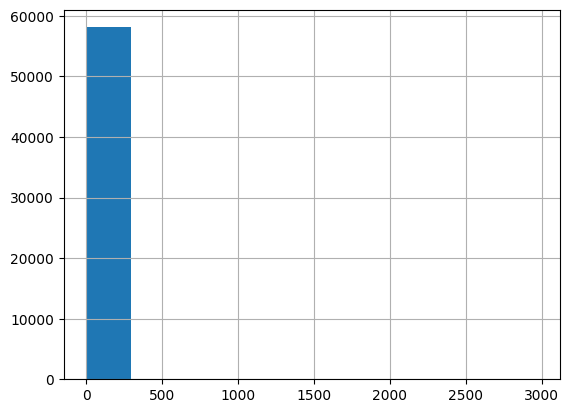

In [53]:
df['FRUIT2'].hist()

Based on the histogram plot, the distribution is very uneven. If we look further we will see the non sense data

In [54]:
df[df['FRUIT2'] > 300]["FRUIT2"].value_counts()

2970    91
900     67
420      9
600      7
450      6
1500     4
1800     3
396      3
630      2
360      2
930      2
330      2
2760     2
720      1
1980     1
540      1
376      1
390      1
1200     1
368      1
2730     1
Name: FRUIT2, dtype: int64

We will drop this nonsense data

In [55]:
df = df[df['FRUIT2'] <= 300]

<Axes: >

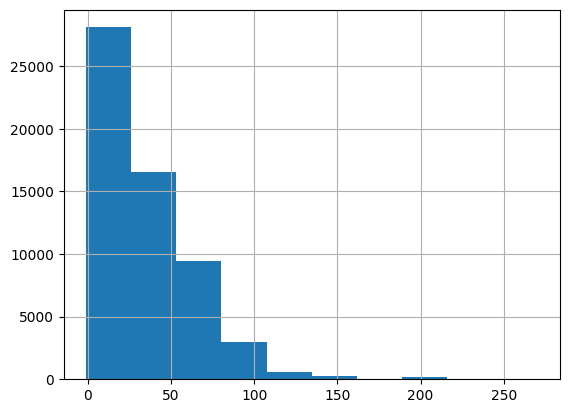

In [56]:
df['FRUIT2'].hist()

Now the distribution is better

### FRUITJU2

This column is treated similarly as before

In [57]:
df[df['FRUITJU2'].astype(str).str.contains('[a-zA-Z]')]['FRUITJU2'].value_counts()

Never                     23879
Less than once a month     2035
Don't Know                  360
Refused                      24
Name: FRUITJU2, dtype: int64

In [58]:
df = df.loc[(df['FRUITJU2'] != "Don't Know") & (df['FRUITJU2'] != "Refused")]

df['FRUITJU2'] = df['FRUITJU2'].apply(encode_fruit_consumption)
df['FRUITJU2'] = df['FRUITJU2'].astype(float)
df['FRUITJU2'] = df['FRUITJU2'].astype(int)

Here's the data distribution plot after the two unwanted values are removed

<Axes: >

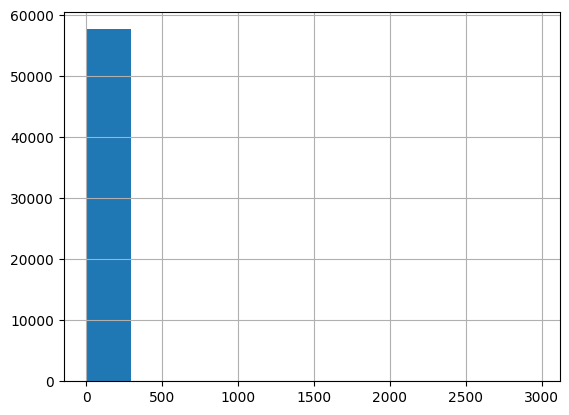

In [59]:
df['FRUITJU2'].hist()

Based on the histogram plot, the distribution is very uneven. If we look further we will see the non sense data

In [60]:
df[df['FRUITJU2'] > 300]["FRUITJU2"].value_counts()

2970    31
900     17
450      8
600      3
396      3
420      2
2640     2
372      1
380      1
750      1
2400     1
360      1
720      1
Name: FRUITJU2, dtype: int64

We will drop this non sense data

In [61]:
df = df[df['FRUITJU2'] <= 300]

<Axes: >

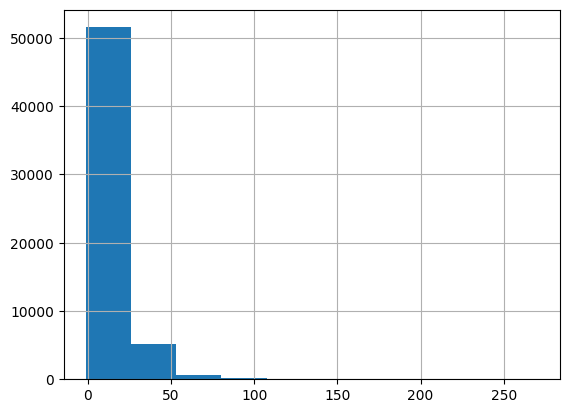

In [62]:
df['FRUITJU2'].hist()

Now the distribution is better

### FVGREEN1

This column is treated similarly as before

In [63]:
df[df['FVGREEN1'].astype(str).str.contains('[a-zA-Z]')]['FVGREEN1'].value_counts()

Never                     2757
Less than once a month     455
Don't Know                 171
Refused                     14
Name: FVGREEN1, dtype: int64

In [64]:
df = df.loc[(df['FVGREEN1'] != "Don't Know") & (df['FVGREEN1'] != "Refused")]

df['FVGREEN1'] = df['FVGREEN1'].apply(encode_fruit_consumption)
df['FVGREEN1'] = df['FVGREEN1'].astype(float)
df['FVGREEN1'] = df['FVGREEN1'].astype(int)

Here's the data distribution plot after the two unwanted values are removed

<Axes: >

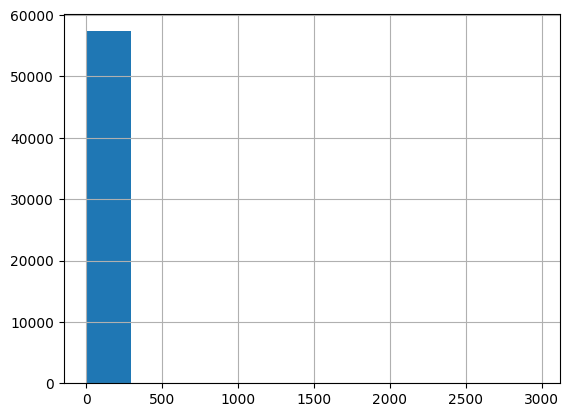

In [65]:
df['FVGREEN1'].hist()

Based on the histogram plot, the distribution is very uneven. If we look further we will see the non sense data

In [66]:
df[df['FVGREEN1'] > 300]["FVGREEN1"].value_counts()

2970    55
900     35
450      8
600      7
396      5
750      4
420      3
840      2
360      2
630      2
2310     1
990      1
Name: FVGREEN1, dtype: int64

We will drop this non sense data

In [67]:
df = df[df['FVGREEN1'] <= 300]

<Axes: >

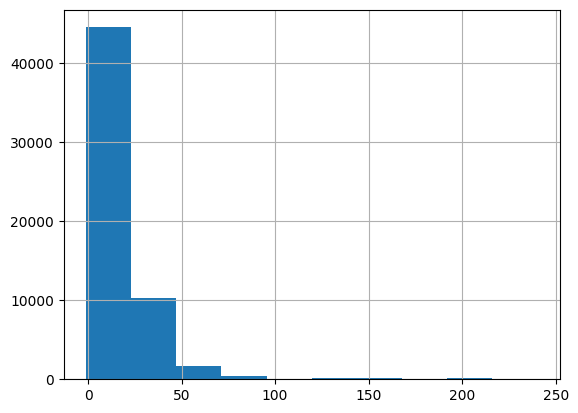

In [68]:
df['FVGREEN1'].hist()

Now the distribution is better

### FRENCHF1

This column is treated similarly as before

In [69]:
df[df['FRENCHF1'].astype(str).str.contains('[a-zA-Z]')]['FRENCHF1'].value_counts()

Never                     5523
Less than once a month     878
Don't Know                 142
Refused                     17
Name: FRENCHF1, dtype: int64

In [70]:
df = df.loc[(df['FRENCHF1'] != "Don't Know") & (df['FRENCHF1'] != "Refused")]

df['FRENCHF1'] = df['FRENCHF1'].apply(encode_fruit_consumption)
df['FRENCHF1'] = df['FRENCHF1'].astype(float)
df['FRENCHF1'] = df['FRENCHF1'].astype(int)

Here's the data distribution plot after the two unwanted values are removed

<Axes: >

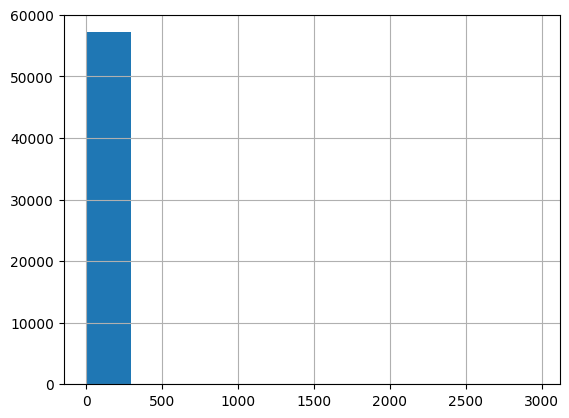

In [71]:
df['FRENCHF1'].hist()

Based on the histogram plot, the distribution is very uneven. If we look further we will see the non sense data

In [72]:
df[df['FRENCHF1'] > 300]["FRENCHF1"].value_counts()

600     7
900     5
450     5
2970    4
368     2
360     2
396     2
364     1
1650    1
Name: FRENCHF1, dtype: int64

We will drop this non sense data

In [73]:
df = df[df['FRENCHF1'] <= 300]

<Axes: >

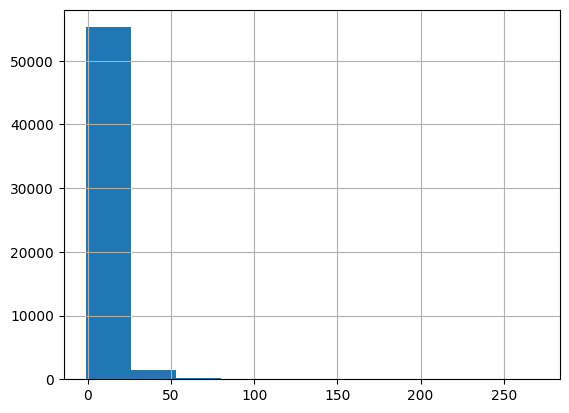

In [74]:
df['FRENCHF1'].hist()

Now the distribution is better

### POTATOE1

This column is treated similarly as before

In [75]:
df[df['POTATOE1'].astype(str).str.contains('[a-zA-Z]')]['POTATOE1'].value_counts()

Never                     6145
Less than once a month    1006
Don't Know                 271
Refused                     13
Name: POTATOE1, dtype: int64

In [76]:
df = df.loc[(df['POTATOE1'] != "Don't Know") & (df['POTATOE1'] != "Refused")]

df['POTATOE1'] = df['POTATOE1'].apply(encode_fruit_consumption)
df['POTATOE1'] = df['POTATOE1'].astype(float)
df['POTATOE1'] = df['POTATOE1'].astype(int)

Here's the data distribution plot after the two unwanted values are removed

<Axes: >

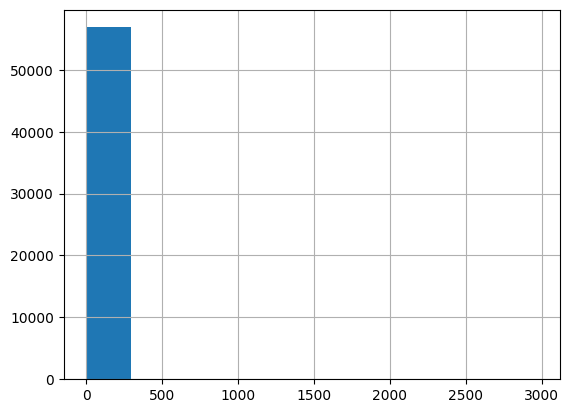

In [77]:
df['POTATOE1'].hist()

Based on the histogram plot, the distribution is very uneven. If we look further we will see the non sense data

In [78]:
df[df['POTATOE1'] > 300]["POTATOE1"].value_counts()

900     4
450     4
2970    3
600     3
750     1
420     1
396     1
376     1
Name: POTATOE1, dtype: int64

We will drop this non sense data

In [79]:
df = df[df['POTATOE1'] <= 300]

<Axes: >

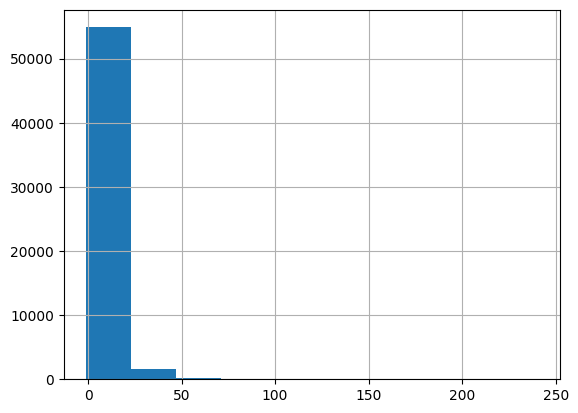

In [80]:
df['POTATOE1'].hist()

Now the distribution is better

### VEGETAB2

This column is treated similarly as before

In [81]:
df[df['VEGETAB2'].astype(str).str.contains('[a-zA-Z]')]['VEGETAB2'].value_counts()

Never                     856
Less than once a month    188
Don't Know                164
Refused                    19
Name: VEGETAB2, dtype: int64

In [82]:
df = df.loc[(df['VEGETAB2'] != "Don't Know") & (df['VEGETAB2'] != "Refused")]

df['VEGETAB2'] = df['VEGETAB2'].apply(encode_fruit_consumption)
df['VEGETAB2'] = df['VEGETAB2'].astype(float)
df['VEGETAB2'] = df['VEGETAB2'].astype(int)

Here's the data distribution plot after the two unwanted values are removed

<Axes: >

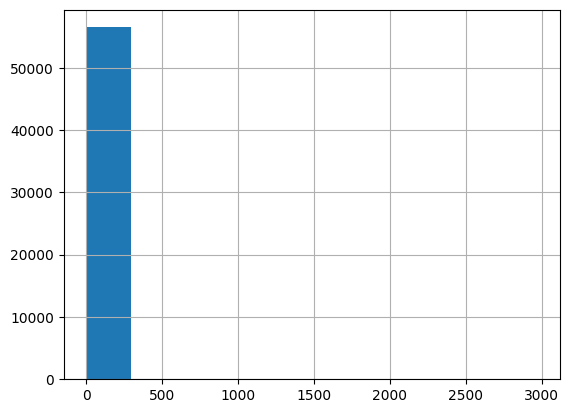

In [83]:
df['VEGETAB2'].hist()

Based on the histogram plot, the distribution is very uneven. If we look further we will see the non sense data

In [84]:
df[df['VEGETAB2'] > 300]["VEGETAB2"].value_counts()

2970    100
900      61
396       8
600       6
450       3
420       2
750       2
840       2
2730      1
810       1
380       1
630       1
Name: VEGETAB2, dtype: int64

We will drop this non sense data

In [85]:
df = df[df['VEGETAB2'] <= 300]

<Axes: >

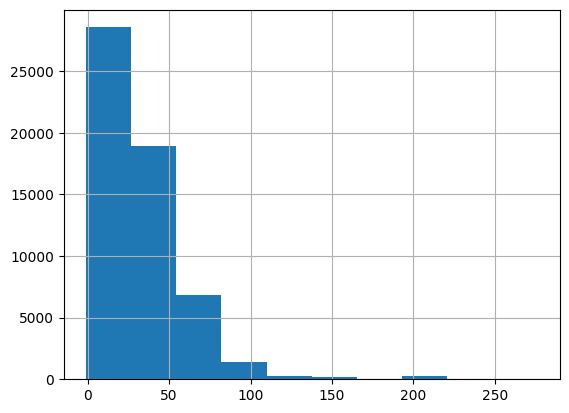

In [86]:
df['VEGETAB2'].hist()

Now the distribution is better

### SEXVAR

Because the data has been categorised well, plotting can be done directly.

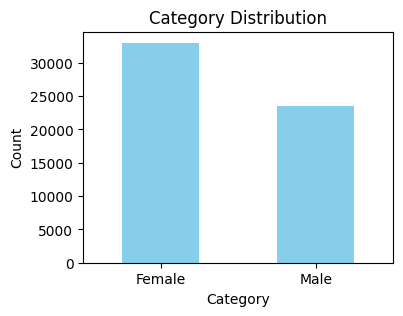

In [87]:
import matplotlib.pyplot as plt

# Count the occurrences of each category
category_counts = df['SEXVAR'].value_counts()

# Plotting
plt.figure(figsize=(4, 3))
category_counts.plot(kind='bar', color='skyblue')
plt.title('Category Distribution')
plt.xlabel('Category')
plt.ylabel('Count')
plt.xticks(rotation=0)
plt.show()

### CVD

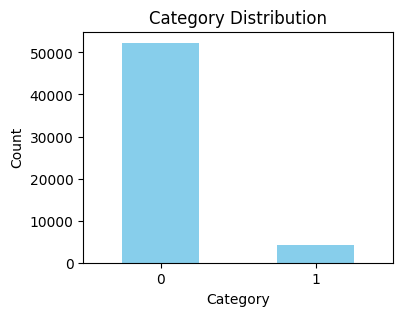

In [88]:
import matplotlib.pyplot as plt

# Count the occurrences of each category
df['CVD'] = df['CVD'].astype(int)
category_counts = df['CVD'].value_counts()

# Plotting
plt.figure(figsize=(4, 3))
category_counts.plot(kind='bar', color='skyblue')
plt.title('Category Distribution')
plt.xlabel('Category')
plt.ylabel('Count')
plt.xticks(rotation=0)
plt.show()

This column is the target column. It can be seen that the data is imbalanced. The handling of imbalanced data will be done during the modelling stage.

## Bi Variate Analysis

In [89]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 56499 entries, 0 to 66946
Data columns (total 24 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   GENHLTH   56499 non-null  object 
 1   MENTHLTH  56499 non-null  float64
 2   CHECKUP1  56499 non-null  object 
 3   EXERANY2  56499 non-null  object 
 4   BPHIGH6   56499 non-null  object 
 5   TOLDHI3   56499 non-null  object 
 6   DIABETE4  56499 non-null  object 
 7   _AGE80    56499 non-null  float64
 8   WEIGHT2   56499 non-null  float64
 9   HEIGHT3   56499 non-null  float64
 10  SMOKE100  56499 non-null  object 
 11  USENOW3   56499 non-null  object 
 12  ECIGNOW1  56499 non-null  object 
 13  ALCDAY5   56499 non-null  int64  
 14  AVEDRNK3  56499 non-null  int32  
 15  MAXDRNKS  56499 non-null  int32  
 16  FRUIT2    56499 non-null  int32  
 17  FRUITJU2  56499 non-null  int32  
 18  FVGREEN1  56499 non-null  int32  
 19  FRENCHF1  56499 non-null  int32  
 20  POTATOE1  56499 non-null  in

Based on the previous EDA, it was found that there are 10 categorical columns and 13 numerical columns. Next, a bivariate analysis will be conducted based on that two types of columns.

In [90]:
categorical_columns = ['GENHLTH', 'CHECKUP1', 'EXERANY2', 'BPHIGH6', 'TOLDHI3', 'DIABETE4', 'SMOKE100', 'USENOW3', 
                       'ECIGNOW1', 'SEXVAR']
numerical_columns = list(set(list(df.columns)) - set(categorical_columns + ['CVD']))
print(categorical_columns)
print(numerical_columns)

['GENHLTH', 'CHECKUP1', 'EXERANY2', 'BPHIGH6', 'TOLDHI3', 'DIABETE4', 'SMOKE100', 'USENOW3', 'ECIGNOW1', 'SEXVAR']
['FRUIT2', 'FVGREEN1', 'FRUITJU2', 'MENTHLTH', 'ALCDAY5', 'MAXDRNKS', 'VEGETAB2', 'HEIGHT3', 'POTATOE1', '_AGE80', 'FRENCHF1', 'AVEDRNK3', 'WEIGHT2']


### Categorical Columns vs Target Column

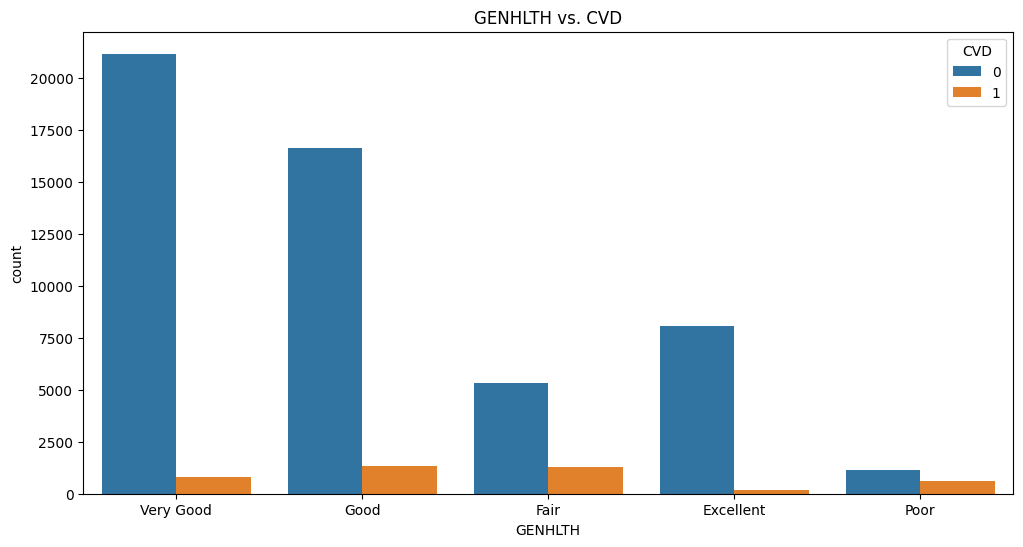

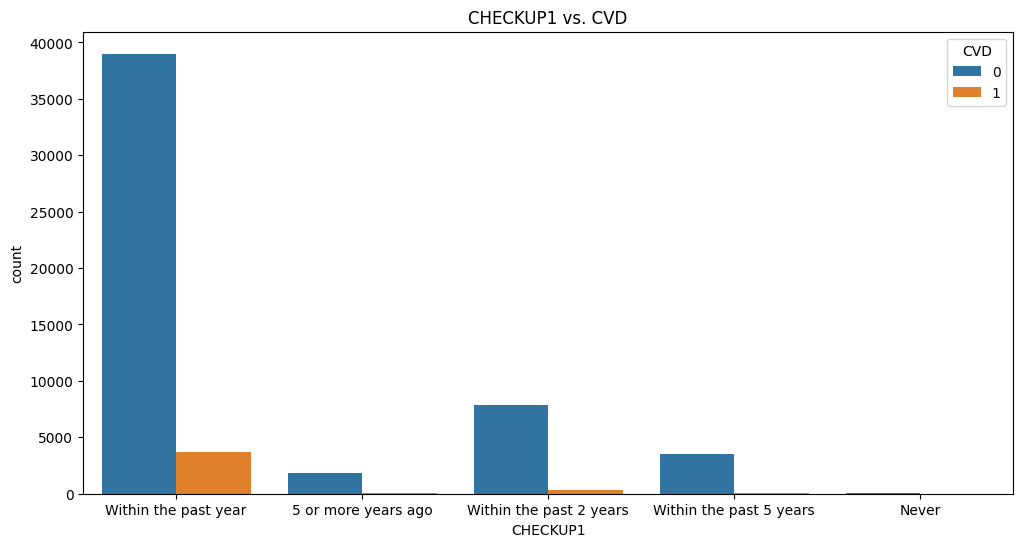

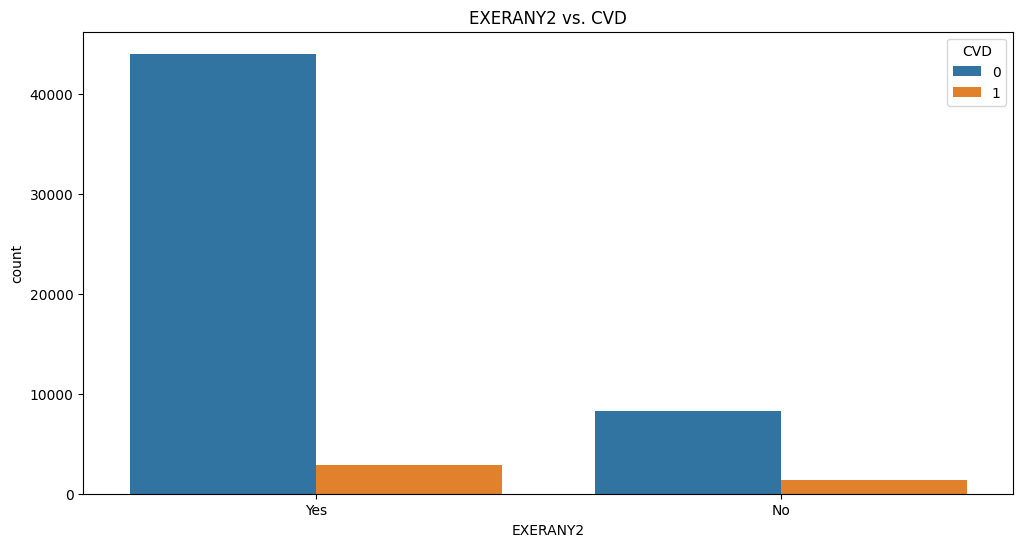

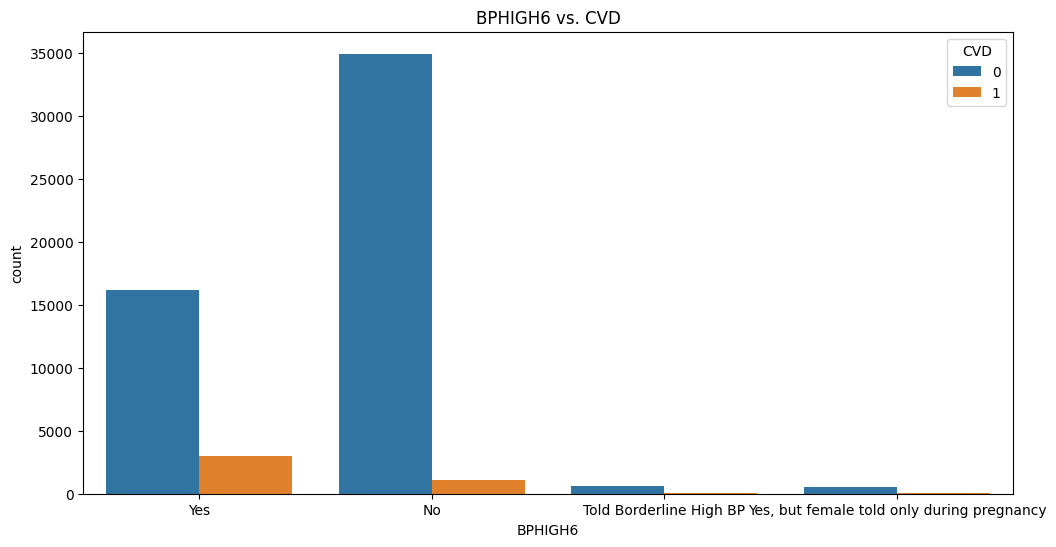

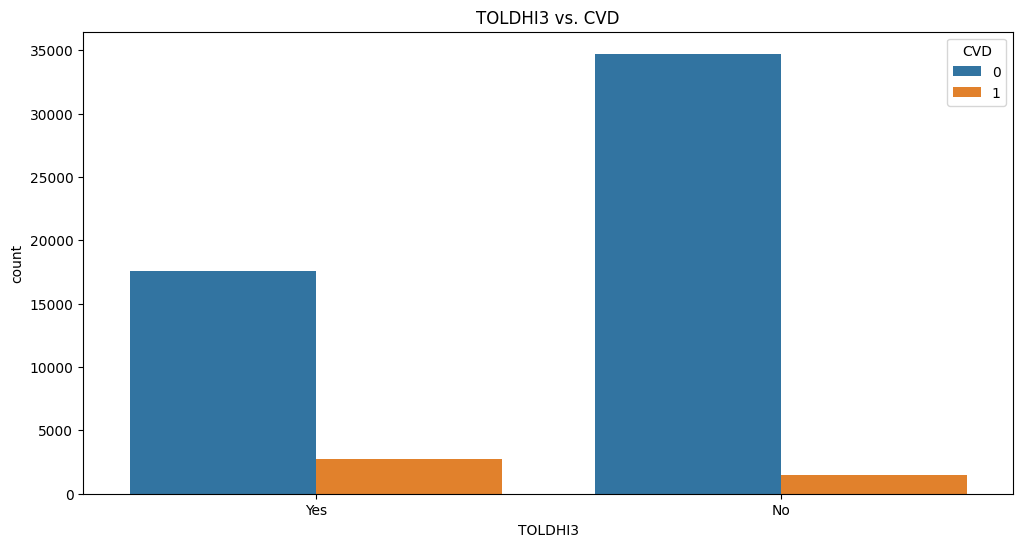

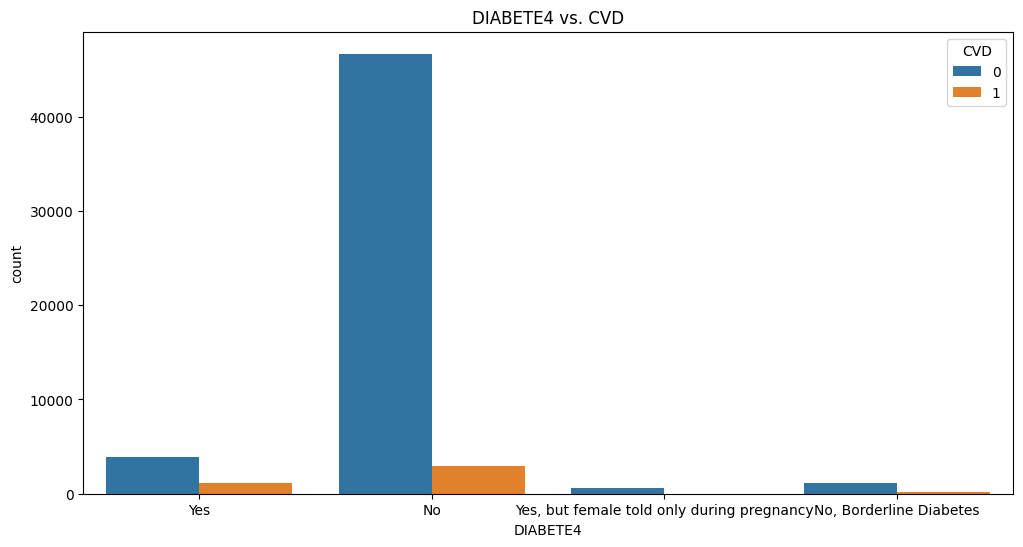

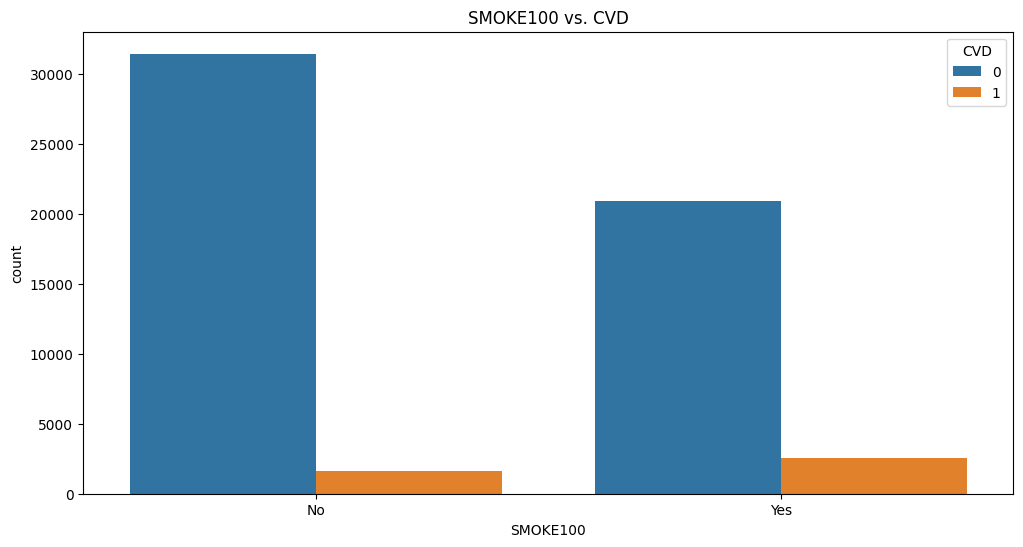

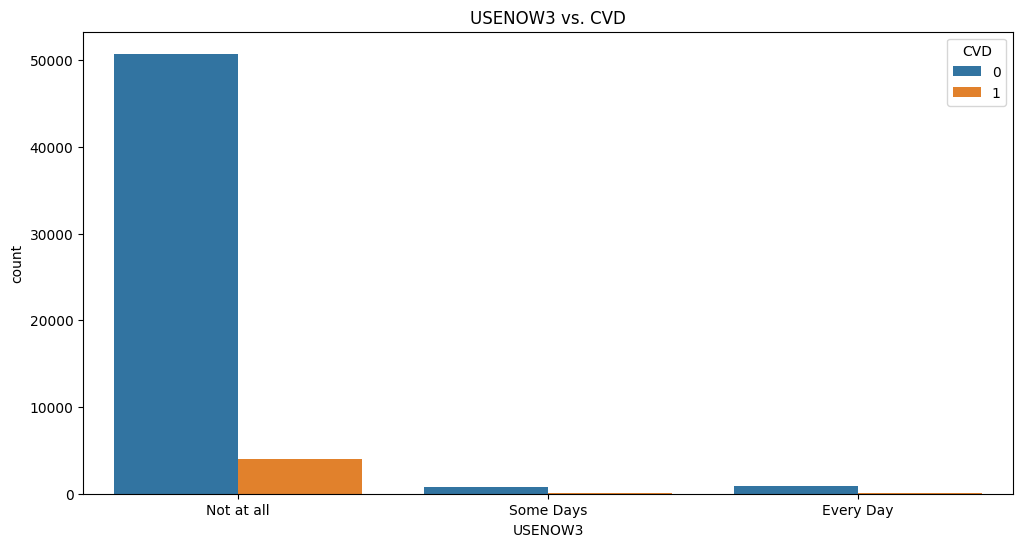

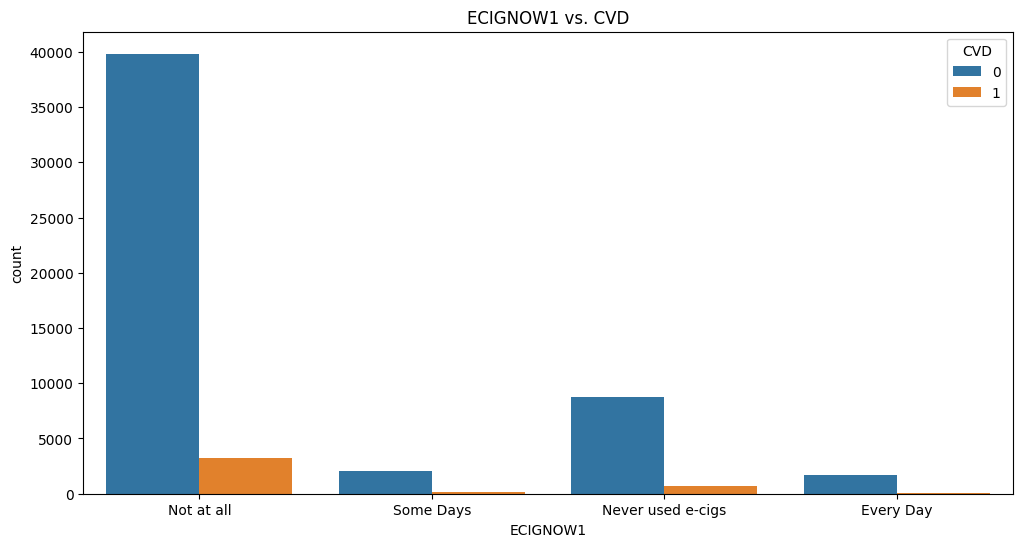

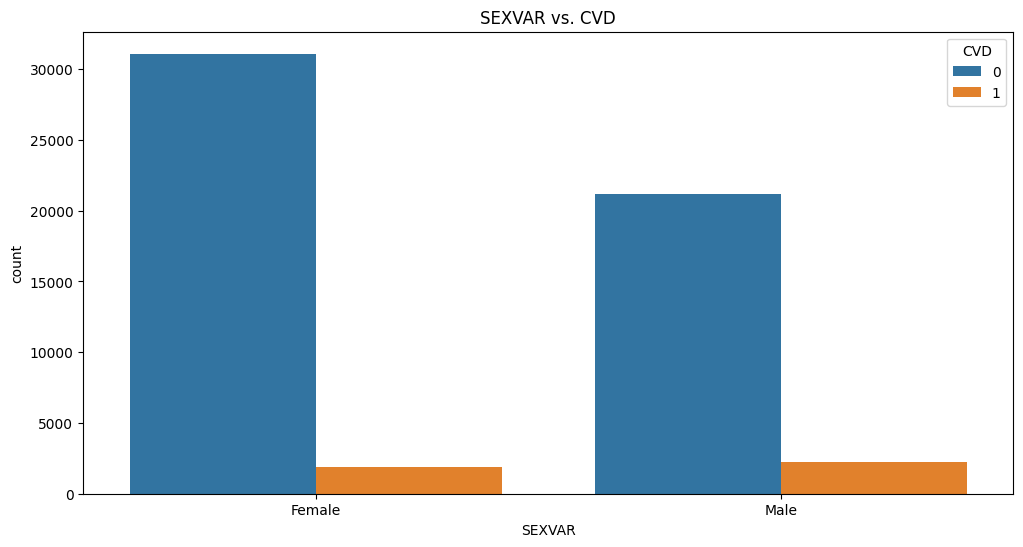

In [91]:
import seaborn as sns
import matplotlib.pyplot as plt

# Iterate over categorical columns
for cat_col in categorical_columns:
    # Categorical vs. Target
    plt.figure(figsize=(12, 6))
    sns.countplot(x=cat_col, hue='CVD', data=df)
    plt.title(f'{cat_col} vs. CVD')
    plt.show()

### Numerical Columns vs Target Column

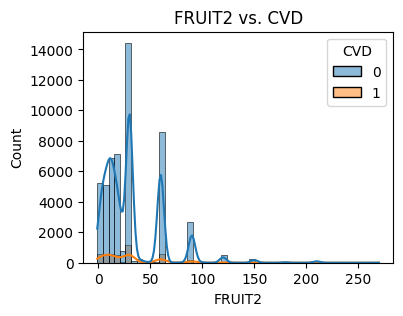

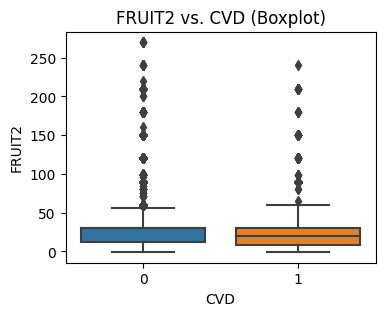

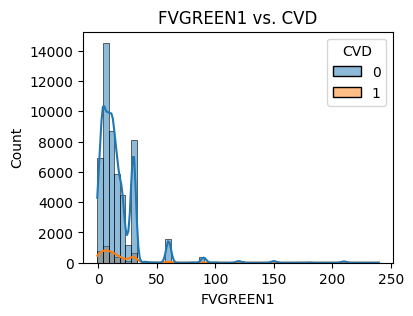

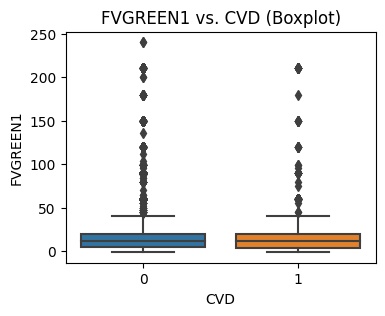

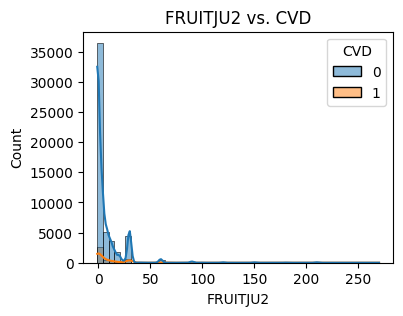

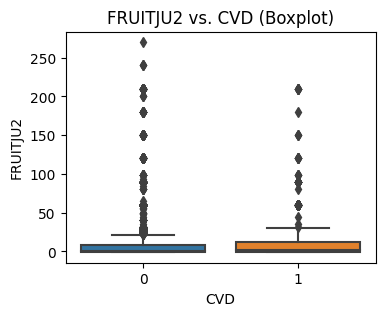

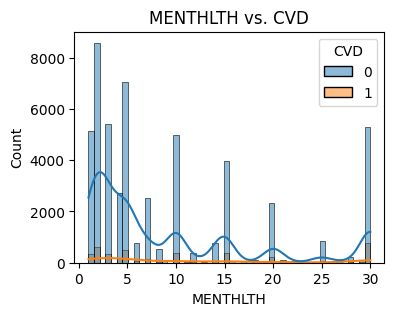

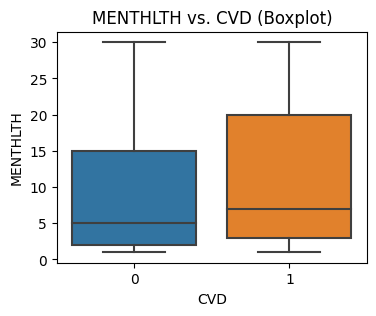

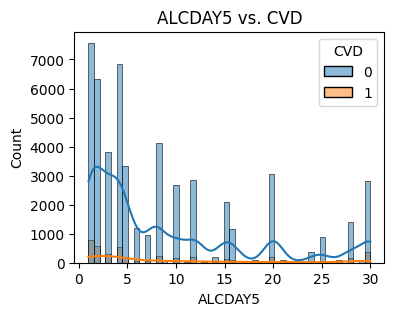

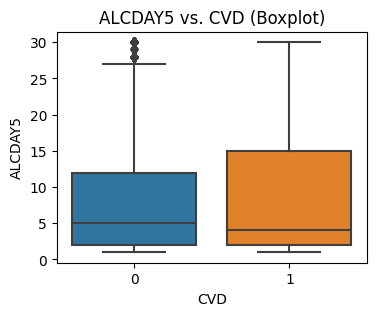

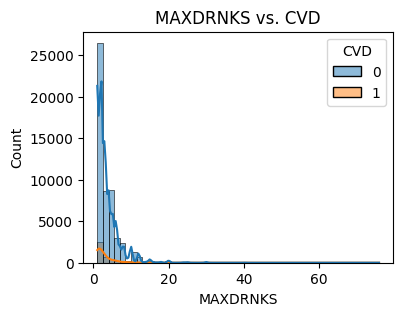

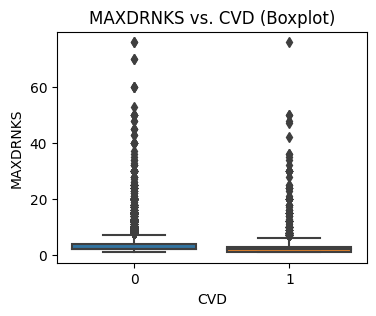

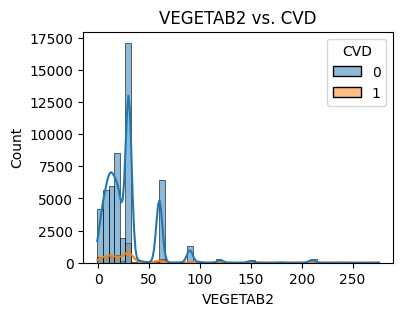

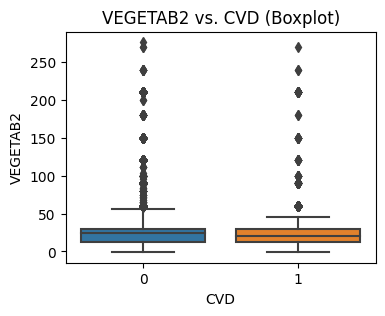

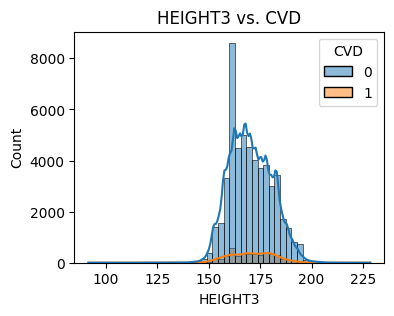

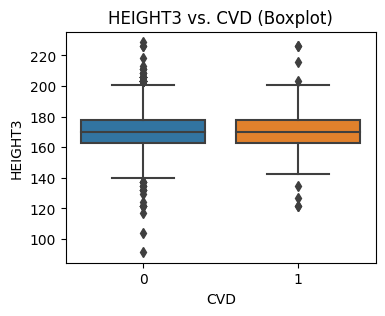

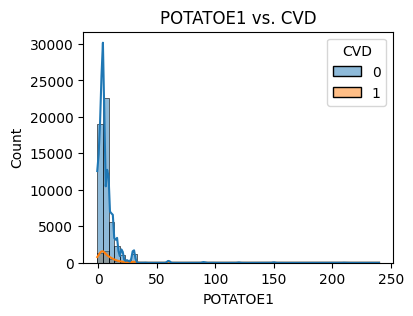

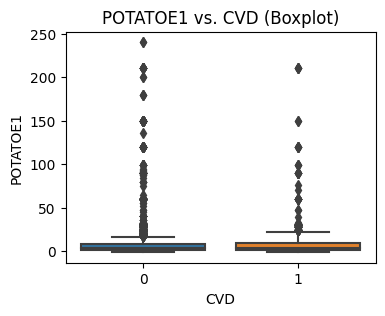

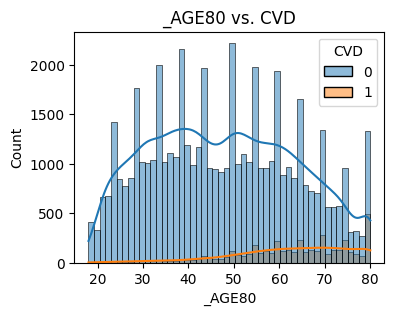

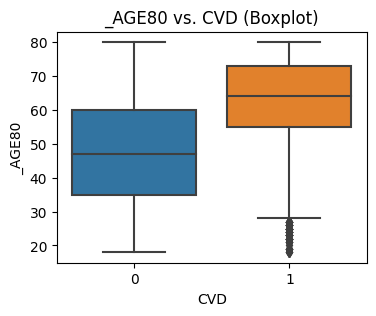

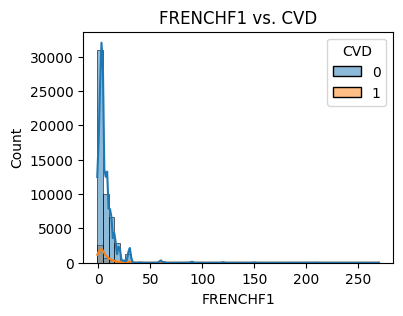

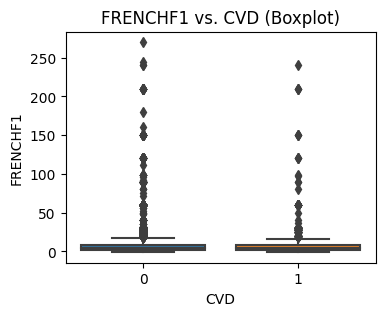

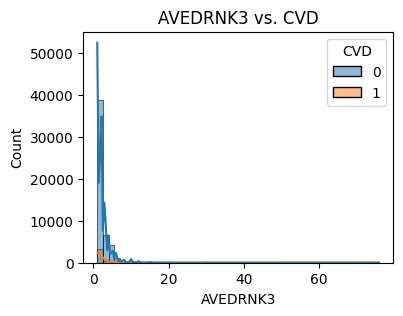

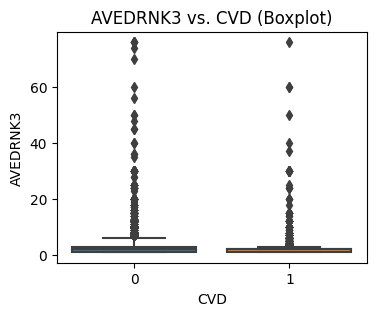

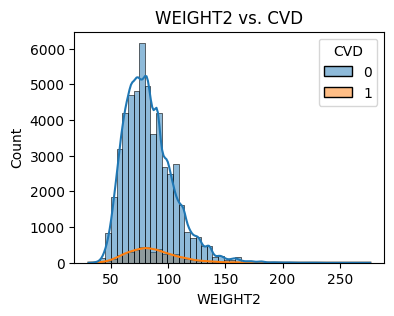

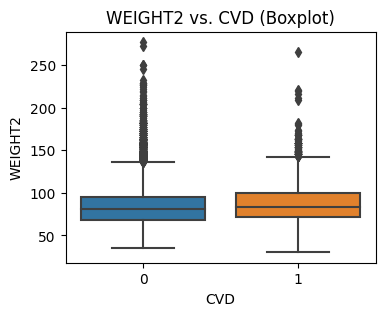

In [92]:
# Iterate over numerical columns
for num_col in numerical_columns:
    # Numerical vs. Target
    plt.figure(figsize=(4, 3))
    sns.histplot(x=df[num_col], hue='CVD', data=df, bins=50,kde=True)
    plt.title(f'{num_col} vs. CVD')
    plt.show()
    
    # Box plot for numerical vs. Target
    plt.figure(figsize=(4, 3))
    sns.boxplot(x='CVD', y=num_col, data=df)
    plt.title(f'{num_col} vs. CVD (Boxplot)')
    plt.show()

As a result of the bivariate analysis, each variable does not directly show a positive correlation or negative correlation. However, there are some variables that have shown a tendency to positive or negative correlation. It may be necessary to use multiple variables to make good predictions.

# Feature Engineering

## One Hot Encoding

The first feature engineering performed is to perform one hot encoding on the BPHIGH6 and DIABETE4 columns.

In [93]:
def ohe_col(df, col_name):
    temp = pd.get_dummies(df[col_name], prefix=col_name)
    df_res = pd.concat((temp, df), axis=1)
    df_res.drop(col_name, axis=1, inplace=True)
    return df_res

df = ohe_col(df, 'BPHIGH6')
df = ohe_col(df, 'DIABETE4')

In [94]:
df.head()

,DIABETE4_No,"DIABETE4_No, Borderline Diabetes",DIABETE4_Yes,"DIABETE4_Yes, but female told only during pregnancy",BPHIGH6_No,BPHIGH6_Told Borderline High BP,BPHIGH6_Yes,"BPHIGH6_Yes, but female told only during pregnancy",GENHLTH,MENTHLTH,...,AVEDRNK3,MAXDRNKS,FRUIT2,FRUITJU2,FVGREEN1,FRENCHF1,POTATOE1,VEGETAB2,SEXVAR,CVD
0,0,0,1,0,0,0,1,0,Very Good,10.0,...,3,6,12,20,3,16,8,20,Female,0
1,1,0,0,0,0,0,1,0,Good,5.0,...,2,2,30,-1,8,8,12,16,Female,0
2,1,0,0,0,1,0,0,0,Fair,5.0,...,1,1,60,4,1,2,8,60,Female,0
4,1,0,0,0,0,0,1,0,Fair,25.0,...,2,2,-1,-1,3,2,4,30,Female,0
5,1,0,0,0,0,0,1,0,Excellent,14.0,...,1,1,30,-1,30,2,25,30,Female,0


## Label Encoding

Next, label encoding is performed on the GENHLTH, CHECKUP1, ECIGNOW1, EXERANY2, TOLDHI3, SMOKE100, USENOW3, and SEXVAR columns. In the GENHLTH, CHECKUP1, and ECIGNOW1 columns, the encoding needs to be adjusted according to the appropriate value level in each column. The EXERANY2, TOLDHI3, SMOKE100, and USENOW3 columns only contain yes and no so they can be made into binary data only. Similarly, the SEXVAR column only shows gender which can be represented only in binary data.

In [95]:
def le_enc(df, col_name, dict):
    new_col = df[col_name].replace(dict)
    return new_col

genhlth_dict = {"Excellent": 4, "Very Good": 3, "Good": 2, "Fair": 1, "Poor":0}
checkup_dict = {"Within the past year": 4, "Within the past 2 years": 3, "Within the past 5 years": 2, 
                 "5 or more years ago": 1, "Never":0}
ecignow1_dict = {"Every Day": 3, "Some Days": 2, "Never used e-cigs": 1, "Not at all": 0}
usenow3_dict = {"Every Day": 2, "Some Days": 1, "Not at all": 0}
yesno_dict = {"Yes":1, "No": 0}
sexvar_dict = {"Male":1, "Female":0}

df['GENHLTH'] = le_enc(df, 'GENHLTH', genhlth_dict)
df['CHECKUP1'] = le_enc(df, 'CHECKUP1', checkup_dict)
df['ECIGNOW1'] = le_enc(df, 'ECIGNOW1', ecignow1_dict)
df['USENOW3'] = le_enc(df, 'USENOW3', usenow3_dict)
df['EXERANY2'] = le_enc(df, 'EXERANY2', yesno_dict)
df['TOLDHI3'] = le_enc(df, 'TOLDHI3', yesno_dict)
df['SMOKE100'] = le_enc(df, 'SMOKE100', yesno_dict)
df['SEXVAR'] = le_enc(df, 'SEXVAR', sexvar_dict)

## Another Feature Engineering

### Computing BMI

From Weight and Height we can compute BMI using this equation

$$
BMI = \frac{{\text{{weight (kg)}}}}{{\text{{(height (m))}}^2}}
$$

In [96]:
df['BMI'] = df['WEIGHT2'] / ((df['HEIGHT3']/100)**2)

For now, feature engineering has been done up to this point. Further feature engineering may be required when doing modelling later.

# Modelling

## Preliminary Steps

At this modelling stage, there are unresolved issues related to imbalanced data. Here we see how severe the imbalanced dataset is. Now we first define X (feature to predict) and y (predicted class).

In [97]:
X = df.drop('CVD', axis=1)
y = df['CVD']

In [98]:
y.value_counts(normalize=True)

0    0.925804
1    0.074196
Name: CVD, dtype: float64

It turned out to be quite severe 92% against 7%. To overcome this problem, the choice was made to perform two methods, namely performing Nearmiss undersample on the main dataset. It is intended that the initial dataset before splitting into train and test has a ratio between classes that is not too far away. Furthermore, oversampling is also carried out on the train set using SMOTENC. Oversampling is done only on the train set so that the test data remains the original data with a ratio between classes that is not too far away. 

Furthermore, some models do not accept the presence of "," in the column name so we need to change it first

In [99]:
X.rename(columns={"DIABETE4_No, Borderline Diabetes": "DIABETE4_No but Borderline Diabetes", 
                   "DIABETE4_Yes, but female told only during pregnancy": "DIABETE4_Yes but female told only during pregnancy",
                   "BPHIGH6_Yes, but female told only during pregnancy": "BPHIGH6_Yes but female told only during pregnancy"
                   }, inplace=True)

## Nearmiss Undersampling

In [100]:
from imblearn.under_sampling import NearMiss

undersampler = NearMiss(sampling_strategy=0.6, version=2)
X_res, y_res = undersampler.fit_resample(X, y)

## Splitting data to train set and test set

In [101]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_res, y_res, test_size=0.2, stratify=y_res, random_state=101)

## SMOTENC Oversampling

In [102]:
new_cat_col = ['DIABETE4_No', 'DIABETE4_No but Borderline Diabetes', 'DIABETE4_Yes', 
               'DIABETE4_Yes but female told only during pregnancy', 'BPHIGH6_No', 'BPHIGH6_Told Borderline High BP', 
               'BPHIGH6_Yes', 'BPHIGH6_Yes but female told only during pregnancy', 'GENHLTH', 'MENTHLTH', 'CHECKUP1', 
               'EXERANY2', 'TOLDHI3', 'SMOKE100', 'USENOW3', 'ECIGNOW1', 'ALCDAY5', 'SEXVAR']

In [103]:
from imblearn.over_sampling import SMOTENC

sm = SMOTENC(random_state=101, categorical_features=new_cat_col)
X_res, y_res = sm.fit_resample(X_train, y_train)

## Training Model

### Random Forest

In [123]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report

rf_model = RandomForestClassifier(random_state=101)
rf_model.fit(X_res, y_res)

y_pred = rf_model.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.92      0.97      0.95      1397
           1       0.94      0.87      0.90       839

    accuracy                           0.93      2236
   macro avg       0.93      0.92      0.93      2236
weighted avg       0.93      0.93      0.93      2236



### LightGBM

In [117]:
from lightgbm import LGBMClassifier
from sklearn.metrics import classification_report

lgbm_model = LGBMClassifier(random_state=101)
lgbm_model.fit(X_res, y_res)

y_pred = lgbm_model.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.94      0.97      0.95      1397
           1       0.95      0.89      0.92       839

    accuracy                           0.94      2236
   macro avg       0.94      0.93      0.94      2236
weighted avg       0.94      0.94      0.94      2236



### XGBoost

In [106]:
from xgboost import XGBClassifier
from sklearn.metrics import classification_report

xgb_model = XGBClassifier(random_state=101)
xgb_model.fit(X_res, y_res)

y_pred = xgb_model.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.94      0.97      0.95      1397
           1       0.95      0.89      0.92       839

    accuracy                           0.94      2236
   macro avg       0.94      0.93      0.94      2236
weighted avg       0.94      0.94      0.94      2236



### Catboost

In [139]:
from catboost import CatBoostClassifier
from sklearn.metrics import classification_report

cb_model = CatBoostClassifier(random_state=101)
cb_model.fit(X_res, y_res)

y_pred = cb_model.predict(X_test)
print(classification_report(y_test, y_pred))

Learning rate set to 0.028879
0:	learn: 0.6439520	total: 5.16ms	remaining: 5.16s
1:	learn: 0.6004044	total: 10.9ms	remaining: 5.45s
2:	learn: 0.5669252	total: 25.8ms	remaining: 8.57s
3:	learn: 0.5360772	total: 36.5ms	remaining: 9.09s
4:	learn: 0.5102012	total: 48.1ms	remaining: 9.58s
5:	learn: 0.4810293	total: 54.1ms	remaining: 8.97s
6:	learn: 0.4542879	total: 64.2ms	remaining: 9.1s
7:	learn: 0.4296428	total: 70.2ms	remaining: 8.7s
8:	learn: 0.4117912	total: 76ms	remaining: 8.37s
9:	learn: 0.3916048	total: 81.1ms	remaining: 8.03s
10:	learn: 0.3737656	total: 86.7ms	remaining: 7.8s
11:	learn: 0.3579460	total: 91.8ms	remaining: 7.55s
12:	learn: 0.3450865	total: 96.8ms	remaining: 7.35s
13:	learn: 0.3315714	total: 102ms	remaining: 7.2s
14:	learn: 0.3207115	total: 107ms	remaining: 7.03s
15:	learn: 0.3112566	total: 112ms	remaining: 6.88s
16:	learn: 0.3020779	total: 117ms	remaining: 6.79s
17:	learn: 0.2938401	total: 123ms	remaining: 6.69s
18:	learn: 0.2867231	total: 128ms	remaining: 6.59s
19:	

## Hyperparameter Tuning Model

At this point, model tuning will be carried out using the optuna library. In optuna, it is necessary to adjust the objective first. For all models, the objective is set to maximise f1-score given the unbalanced ratio between classes in the test data. 

### Random Forest Tuning

In [124]:
import optuna
import numpy as np
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import f1_score

# Define objective functions for random forest
def rf_objective(trial):
    params = {
        'random_state': 101,
        'n_estimators': trial.suggest_int('n_estimators', 100, 1000),
        'max_depth': trial.suggest_int('max_depth', 2, 32),
        'min_samples_split': trial.suggest_int('min_samples_split', 2, 20),
        'min_samples_leaf': trial.suggest_int('min_samples_leaf', 1, 20),
        'max_features': trial.suggest_categorical('max_features', ['sqrt', 'log2', None]),
    }
    model = RandomForestClassifier(**params)
    model.fit(X_res, y_res)
    preds = model.predict(X_test)
    return f1_score(y_test, preds, average='macro')

# Define Optuna study for random forest
rf_study = optuna.create_study(direction='maximize')

# Optimize each random forest
rf_study.optimize(rf_objective, n_trials=100)

# Print best hyperparameters and F1-score for random forest
print("Random Forest - Best trial:")
print(rf_study.best_trial.params)
print("F1-score: ", rf_study.best_value)

[I 2024-03-30 11:32:27,002] A new study created in memory with name: no-name-ad93f9f9-efe4-4fc6-b596-cf7210900306
[I 2024-03-30 11:32:35,716] Trial 0 finished with value: 0.9263596527719998 and parameters: {'n_estimators': 887, 'max_depth': 27, 'min_samples_split': 4, 'min_samples_leaf': 3, 'max_features': 'sqrt'}. Best is trial 0 with value: 0.9263596527719998.
[I 2024-03-30 11:32:47,476] Trial 1 finished with value: 0.9282906648404738 and parameters: {'n_estimators': 588, 'max_depth': 5, 'min_samples_split': 14, 'min_samples_leaf': 5, 'max_features': None}. Best is trial 1 with value: 0.9282906648404738.
[I 2024-03-30 11:32:48,987] Trial 2 finished with value: 0.9213024051621518 and parameters: {'n_estimators': 179, 'max_depth': 13, 'min_samples_split': 10, 'min_samples_leaf': 2, 'max_features': 'log2'}. Best is trial 1 with value: 0.9282906648404738.
[I 2024-03-30 11:32:54,607] Trial 3 finished with value: 0.9251255450909143 and parameters: {'n_estimators': 714, 'max_depth': 13, 'mi

Random Forest - Best trial:
{'n_estimators': 423, 'max_depth': 14, 'min_samples_split': 8, 'min_samples_leaf': 1, 'max_features': None}
F1-score:  0.9382875496980898


Furthermore, the results of the best params from the tuning process are also applied to the model.

In [134]:
rf_model_tuned = RandomForestClassifier(random_state=101, **rf_study.best_trial.params)
rf_model_tuned.fit(X_res, y_res)

y_pred = rf_model_tuned.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.93      0.98      0.96      1397
           1       0.96      0.88      0.92       839

    accuracy                           0.94      2236
   macro avg       0.95      0.93      0.94      2236
weighted avg       0.94      0.94      0.94      2236



In random forest, the evaluation metric results are better than before tuning. In general, the evaluation metrics reach 94% to 95%.

### LightGBM Tuning

In [125]:
import lightgbm as lgb

# Define objective functions for lgbm
def lgb_objective(trial):
    params = {
        'boosting_type': 'gbdt',
        'num_leaves': trial.suggest_int('num_leaves', 31, 256),
        'max_depth': trial.suggest_int('max_depth', -1, 32),
        'n_estimators': trial.suggest_int('n_estimators', 100, 1000),
        'objective': 'binary',
        'min_split_gain': trial.suggest_float('min_split_gain', 0.0, 1.0),
        'min_child_weight': trial.suggest_float('min_child_weight', 1e-3, 100.0),
        'min_child_samples': trial.suggest_int('min_child_samples', 5, 100),
        'subsample': trial.suggest_float('subsample', 0.4, 1.0),
        'subsample_freq': trial.suggest_int('subsample_freq', 0, 10),
        'colsample_bytree': trial.suggest_float('colsample_bytree', 0.4, 1.0),
        'reg_alpha': trial.suggest_float('reg_alpha', 0.0, 1.0),
        'reg_lambda': trial.suggest_float('reg_lambda', 0.0, 1.0),
        'random_state': 101
    }
    model = lgb.LGBMClassifier(**params)
    model.fit(X_train, y_train)
    preds = model.predict(X_test)
    return f1_score(y_test, preds, average='macro')

# Define Optuna study for lgbm
lgb_study = optuna.create_study(direction='maximize')

# Optimize each lgbm
lgb_study.optimize(lgb_objective, n_trials=100)

# Print best hyperparameters and F1-score for lgbm
print("LightGBM - Best trial:")
print(lgb_study.best_trial.params)
print("F1-score: ", lgb_study.best_value)

[I 2024-03-30 11:55:14,470] A new study created in memory with name: no-name-39fbe05e-630f-4571-bb37-8e3a7afda406
[I 2024-03-30 11:55:14,615] Trial 0 finished with value: 0.93493947858473 and parameters: {'num_leaves': 165, 'max_depth': 29, 'n_estimators': 191, 'min_split_gain': 0.075107206942579, 'min_child_weight': 49.966870027477626, 'min_child_samples': 50, 'subsample': 0.9653981294067018, 'subsample_freq': 9, 'colsample_bytree': 0.9503459344582942, 'reg_alpha': 0.9790446880312295, 'reg_lambda': 0.8715085141579928}. Best is trial 0 with value: 0.93493947858473.
[I 2024-03-30 11:55:14,673] Trial 1 finished with value: 0.9277155852014429 and parameters: {'num_leaves': 202, 'max_depth': -1, 'n_estimators': 115, 'min_split_gain': 0.9109321515247607, 'min_child_weight': 90.14953344881081, 'min_child_samples': 24, 'subsample': 0.9305957349396735, 'subsample_freq': 5, 'colsample_bytree': 0.639268834811584, 'reg_alpha': 0.6528368006244569, 'reg_lambda': 0.9769722102033136}. Best is trial 0

LightGBM - Best trial:
{'num_leaves': 105, 'max_depth': 14, 'n_estimators': 845, 'min_split_gain': 0.1858546367104753, 'min_child_weight': 4.24494090039388, 'min_child_samples': 14, 'subsample': 0.7111727536197556, 'subsample_freq': 0, 'colsample_bytree': 0.9652288850136151, 'reg_alpha': 0.6607215095085601, 'reg_lambda': 0.7903285683337721}
F1-score:  0.9436789516106617


Furthermore, the results of the best params from the tuning process are also applied to the model.

In [135]:
lgbm_model_tuned = LGBMClassifier(random_state=101, **lgb_study.best_trial.params)
lgbm_model_tuned.fit(X_res, y_res)

y_pred = lgbm_model_tuned.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.93      0.97      0.95      1397
           1       0.95      0.88      0.92       839

    accuracy                           0.94      2236
   macro avg       0.94      0.93      0.94      2236
weighted avg       0.94      0.94      0.94      2236



In the lightgbm model, there is not too much significant difference between before tuning and after tuning.

### XGBoost Tuning

In [129]:
import xgboost as xgb

# Define objective functions for xgb
def xgb_objective(trial):
    params = {
        'random_state': 101,
        'objective': 'binary:logistic',
        'eval_metric': 'logloss',
        'max_depth': trial.suggest_int('max_depth', 6, 32),
        'subsample': trial.suggest_float('subsample', 0.4, 1.0),
        'colsample_bytree': trial.suggest_float('colsample_bytree', 0.4, 1.0),
        'lambda': trial.suggest_float('lambda', 1e-8, 10.0, log=True),
        'alpha': trial.suggest_float('alpha', 1e-8, 10.0, log=True),
        'min_child_weight': trial.suggest_float('min_child_weight', 1e-8, 100.0, log=True),
    }
    dtrain = xgb.DMatrix(X_res, label=y_res)
    dtest = xgb.DMatrix(X_test, label=y_test)
    model = xgb.train(params, dtrain)
    preds = model.predict(dtest)
    pred_labels = np.rint(preds)
    return f1_score(y_test, pred_labels, average='macro')

# Define Optuna study for each xgb
xgb_study = optuna.create_study(direction='maximize')

# Optimize each xgb
xgb_study.optimize(xgb_objective, n_trials=100)

# Print best hyperparameters and F1-score for each xgb
print("XGBoost - Best trial:")
print(xgb_study.best_trial.params)
print("F1-score: ", xgb_study.best_value)

[I 2024-03-30 12:00:37,298] A new study created in memory with name: no-name-64b1fd56-c7a5-4445-9fc8-7110bc349bf9
[I 2024-03-30 12:00:37,515] Trial 0 finished with value: 0.8819436591839565 and parameters: {'max_depth': 26, 'subsample': 0.5864380249636059, 'colsample_bytree': 0.5396858817356314, 'lambda': 2.5413382416535946e-08, 'alpha': 1.8928656837897236e-06, 'min_child_weight': 2.2096134355048284e-08}. Best is trial 0 with value: 0.8819436591839565.
[I 2024-03-30 12:00:37,573] Trial 1 finished with value: 0.9283742835869999 and parameters: {'max_depth': 6, 'subsample': 0.6217665248143653, 'colsample_bytree': 0.8704772372152804, 'lambda': 0.02408301979754851, 'alpha': 4.909343927296996e-06, 'min_child_weight': 0.01078813743834582}. Best is trial 1 with value: 0.9283742835869999.
[I 2024-03-30 12:00:37,651] Trial 2 finished with value: 0.9308858447488584 and parameters: {'max_depth': 10, 'subsample': 0.6415088696239826, 'colsample_bytree': 0.647790911534426, 'lambda': 0.37170926127004

XGBoost - Best trial:
{'max_depth': 19, 'subsample': 0.8634681175688355, 'colsample_bytree': 0.8492610922850661, 'lambda': 1.0179920372688696, 'alpha': 0.037637190580289144, 'min_child_weight': 0.04233429684019626}
F1-score:  0.936482328024292


Furthermore, the results of the best params from the tuning process are also applied to the model.

In [136]:
xgb_model_tuned = XGBClassifier(random_state=101, **xgb_study.best_trial.params)
xgb_model_tuned.fit(X_res, y_res)

y_pred = xgb_model_tuned.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.93      0.98      0.96      1397
           1       0.96      0.88      0.92       839

    accuracy                           0.94      2236
   macro avg       0.95      0.93      0.94      2236
weighted avg       0.94      0.94      0.94      2236



In the xgboost model, there is a difference in the macro average of precision which increases from 94% to 95%.

### Catboost Tuning

In [143]:
import catboost as cb

# Define objective functions for catboost
def cb_objective(trial):
    params = {
        'iterations': trial.suggest_int('iterations', 500, 2000),
        'depth': trial.suggest_int('depth', 4, 10),
        'l2_leaf_reg': trial.suggest_float('l2_leaf_reg', 0.1, 10, log=True),
        'subsample': trial.suggest_float('subsample', 0.5, 1),
        'rsm': trial.suggest_float('rsm', 0.5, 1),
        'random_strength': trial.suggest_float('random_strength', 0.5, 1),
        'border_count': trial.suggest_int('border_count', 32, 255),
        'bagging_temperature': trial.suggest_float('bagging_temperature', 0, 1)
    }

    gbm = cb.CatBoostClassifier(**params)

    gbm.fit(X_res,y_res, verbose=0)

    preds = gbm.predict(X_test)
    pred_labels = np.rint(preds)

    return f1_score(y_test, pred_labels, average='macro')

# Define Optuna study for catboost
cb_study = optuna.create_study(direction='maximize')

# Optimize each catboost
cb_study.optimize(cb_objective, n_trials=100)

# Print best hyperparameters and F1-score for catboost
print("CatBoost - Best trial:")
print(cb_study.best_trial.params)
print("F1-score: ", cb_study.best_value)

[I 2024-03-30 12:29:30,951] A new study created in memory with name: no-name-b2371fc7-d5eb-4a2b-8107-4aee0edb1696
[I 2024-03-30 12:29:38,616] Trial 0 finished with value: 0.9389231557670246 and parameters: {'iterations': 1171, 'depth': 7, 'l2_leaf_reg': 5.071751395795911, 'subsample': 0.7063617949586294, 'rsm': 0.5964415453877062, 'random_strength': 0.5043384070458307, 'border_count': 196, 'bagging_temperature': 0.33702909556501515}. Best is trial 0 with value: 0.9389231557670246.
[I 2024-03-30 12:29:44,220] Trial 1 finished with value: 0.9399249798929472 and parameters: {'iterations': 1051, 'depth': 6, 'l2_leaf_reg': 7.0432810233889915, 'subsample': 0.6873882737032975, 'rsm': 0.9751746378332152, 'random_strength': 0.5235897474379949, 'border_count': 146, 'bagging_temperature': 0.6644888523145946}. Best is trial 1 with value: 0.9399249798929472.
[I 2024-03-30 12:29:50,418] Trial 2 finished with value: 0.939489158600539 and parameters: {'iterations': 1418, 'depth': 4, 'l2_leaf_reg': 8.4

CatBoost - Best trial:
{'iterations': 534, 'depth': 8, 'l2_leaf_reg': 6.718308011287609, 'subsample': 0.7439614701603836, 'rsm': 0.8033523261139551, 'random_strength': 0.653461991269538, 'border_count': 204, 'bagging_temperature': 0.7915614901190929}
F1-score:  0.9418315769209757


Furthermore, the results of the best params from the tuning process are also applied to the model.

In [144]:
cb_model_tuned = CatBoostClassifier(random_state=101, **cb_study.best_trial.params)
cb_model_tuned.fit(X_res, y_res)

y_pred = cb_model_tuned.predict(X_test)
print(classification_report(y_test, y_pred))

0:	learn: 0.6421574	total: 23.9ms	remaining: 12.7s
1:	learn: 0.5966455	total: 34.5ms	remaining: 9.18s
2:	learn: 0.5571783	total: 45.2ms	remaining: 7.99s
3:	learn: 0.5251223	total: 54ms	remaining: 7.16s
4:	learn: 0.4943617	total: 61.7ms	remaining: 6.53s
5:	learn: 0.4663947	total: 70ms	remaining: 6.16s
6:	learn: 0.4399677	total: 77.7ms	remaining: 5.85s
7:	learn: 0.4166627	total: 86.2ms	remaining: 5.67s
8:	learn: 0.3978958	total: 93.8ms	remaining: 5.47s
9:	learn: 0.3808394	total: 103ms	remaining: 5.37s
10:	learn: 0.3645902	total: 111ms	remaining: 5.26s
11:	learn: 0.3494781	total: 119ms	remaining: 5.18s
12:	learn: 0.3349351	total: 127ms	remaining: 5.09s
13:	learn: 0.3225544	total: 135ms	remaining: 5.03s
14:	learn: 0.3117823	total: 144ms	remaining: 4.99s
15:	learn: 0.3008341	total: 153ms	remaining: 4.95s
16:	learn: 0.2912410	total: 161ms	remaining: 4.9s
17:	learn: 0.2823826	total: 169ms	remaining: 4.85s
18:	learn: 0.2743828	total: 177ms	remaining: 4.79s
19:	learn: 0.2665005	total: 185ms	rem

In the catboost model, there is no significant difference between before and after tuning.

### Tuning Summary

The following table summarises the metric evaluation that was successfully obtained on default parameters and tuned parameters

| Model             | Accuracy | Precision | Recall | F1-score |
|-------------------|----------|-----------|--------|----------|
| RF Default Params | 93       | 93        | 92     | 93       |
| LGBM Default Params | 94     | 94        | 93     | 94       |
| XGB Default Params | 94      | 94        | 93     | 94       |
| CB Default Params  | 94      | 95        | 93     | 94       |
| RF Tuned Params    | 94      | 95        | 93     | 94       |
| LGBM Tuned Params  | 94      | 94        | 93     | 94       |
| XGB Tuned Params   | 94      | 95        | 93     | 94       |
| CB Tuned Params    | 94      | 95        | 93     | 94       |


Based on these results, several models with the best evaluation metrics were obtained. These models include the catboost model with default parameters, random forest model with tuned parameters, xgboost with tuned parameters, and catboost with tuned parameters. Among these models can be directly selected and deployed on the API backend. However, in this project we want to use the fastest model in making predictions. So we check it through the following code.

In [150]:
import time

# Time RF model inference
start_time = time.time()
rf_predictions = rf_model_tuned.predict(X_test)
end_time = time.time()
rf_inference_time = end_time - start_time

# Time XGB model inference
start_time = time.time()
xgb_predictions = xgb_model_tuned.predict(X_test)
end_time = time.time()
xgb_inference_time = end_time - start_time

# Time CB default model inference
start_time = time.time()
cb_predictions_default = cb_model.predict(X_test)
end_time = time.time()
cb_inference_time_default = end_time - start_time

# Time CB model inference
start_time = time.time()
cb_predictions = cb_model_tuned.predict(X_test)
end_time = time.time()
cb_inference_time = end_time - start_time

print("RF Inference Time:", rf_inference_time)
print("XGB Inference Time:", xgb_inference_time)
print("CB Default Inference Time:", cb_inference_time_default)
print("CB Inference Time:", cb_inference_time)

RF Inference Time: 0.08699584007263184
XGB Inference Time: 0.005001068115234375
CB Default Inference Time: 0.003000020980834961
CB Inference Time: 0.0019991397857666016


Based on these results, the parameter-tuned catboost model is the fastest model in making predictions. Thus, we will use this model to build the backend model API later.

### Saving Best Model

Furthermore, to be able to deploy the model, the model must be saved first. For catboost models, the built-in save function save_model() can be used.

In [151]:
cb_model_tuned.save_model("./cb_model")